In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns



Importing the data

In [2]:
Tl_stamp=pd.read_csv('/Users/agajanagamyradov/Downloads/C7_Input Files/dataset/fact_stamps.csv')


In [3]:
Tl_transportation=pd.read_csv('/Users/agajanagamyradov/Downloads/C7_Input Files/dataset/fact_transport.csv')


In [4]:
Tl_Ipass=pd.read_csv('/Users/agajanagamyradov/Downloads/C7_Input Files/dataset/fact_TS_iPASS.csv')

In [5]:
Tl_stamp.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


converting 'month' column to datetime

In [6]:

Tl_stamp['month']= pd.to_datetime(Tl_stamp['month'])

In [7]:
Tl_stamp['year']=Tl_stamp['month'].dt.year

1.Top 5 districts with the most document registration revenue from 2019 to 2022

Choossing columns from 2019 to 2022

In [8]:
Tl_stamp['year'].value_counts()

2020    384
2022    384
2021    352
2019    288
2023     96
Name: year, dtype: int64

In [9]:
years1922=[2019,2020,2021,2022]

In [10]:
Tl_stamp1922=Tl_stamp[Tl_stamp['year'].isin(years1922)]

In [11]:
Tl_stamp1922

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,year
0,14_1,2019-04-01,4533,59236363,0,0,2019
1,17_3,2019-04-01,4151,41508762,0,0,2019
2,20_3,2019-04-01,2116,23674170,0,0,2019
3,21_5,2019-04-01,1089,15915285,0,0,2019
4,23_1,2019-04-01,6133,82593256,0,0,2019
...,...,...,...,...,...,...,...
1403,20_4,2022-12-01,1496,57282591,1479,57747406,2022
1404,20_1,2022-12-01,3004,142858373,3035,142058913,2022
1405,19_1,2022-12-01,1212,42679882,1271,43190728,2022
1406,21_2,2022-12-01,887,20785376,890,19938358,2022


Grouping the districts to find out top 5 districts for a revenue in Billions

In [12]:
top5revenue=Tl_stamp.groupby('dist_code')['documents_registered_rev'].sum().sort_values(axis=0,ascending=False).head(5)

In [13]:
top5revenue

dist_code
15_1    108198682809
15_2     64071382839
16_1     38396743983
17_2     22024502771
21_1      7927494100
Name: documents_registered_rev, dtype: int64

writing values in Billion

In [14]:
toppp5=top5revenue/1e9

In [15]:
toppp5

dist_code
15_1    108.198683
15_2     64.071383
16_1     38.396744
17_2     22.024503
21_1      7.927494
Name: documents_registered_rev, dtype: float64

In [16]:
type(toppp5)

pandas.core.series.Series

In [17]:
topdict=toppp5.to_dict()

converting values into a Dataframe

In [18]:
results_df=pd.DataFrame(columns=['dist_code','revenue','as'])
for key,value in topdict.items():
    results_df=results_df.append({'dist_code':key,'revenue':value,'as':'Billions'},ignore_index=True)

In [19]:
rev_docs_top5=results_df
rev_docs_top5

,dist_code,revenue,as
0,15_1,108.198683,Billions
1,15_2,64.071383,Billions
2,16_1,38.396744,Billions
3,17_2,22.024503,Billions
4,21_1,7.927494,Billions


reseting index to start from 1

In [20]:
rev_docs_top5.index=range(1,len(rev_docs_top5)+1)

Top 5 districts with highes document registration revenue

In [21]:
rev_docs_top5

,dist_code,revenue,as
1,15_1,108.198683,Billions
2,15_2,64.071383,Billions
3,16_1,38.396744,Billions
4,17_2,22.024503,Billions
5,21_1,7.927494,Billions


In [22]:
Tl_stamp

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,year
0,14_1,2019-04-01,4533,59236363,0,0,2019
1,17_3,2019-04-01,4151,41508762,0,0,2019
2,20_3,2019-04-01,2116,23674170,0,0,2019
3,21_5,2019-04-01,1089,15915285,0,0,2019
4,23_1,2019-04-01,6133,82593256,0,0,2019
...,...,...,...,...,...,...,...
1499,20_4,2023-03-01,1510,54036552,1596,57171081,2023
1500,14_5,2023-03-01,980,23898383,1026,23106330,2023
1501,21_1,2023-03-01,4321,279791569,4642,284765300,2023
1502,22_2,2023-03-01,1255,18695648,1566,22453502,2023


2.1 Difference in revenue between revenue from document and revenue from estamps

In [23]:
Sum_of_rev_estamp=Tl_stamp['estamps_challans_rev'].sum()

In [24]:
Sum_of_rev_documents=Tl_stamp['documents_registered_rev'].sum()

In [25]:
Difference_in_rev=Sum_of_rev_estamp-Sum_of_rev_documents

In [26]:
Difference_in_rev=Difference_in_rev/1e9

In [27]:
Difference_in_rev

-74.547519499

So over all years estamps made 74Billion less in revenue than revenue by documents

2.2 Revenue from document registration and estamp in 2022

In [28]:
year22=[2022]


In [29]:
Tl_stamp2022=Tl_stamp[Tl_stamp['year'].isin(year22)]

In [30]:
Tl_stamp2022.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,year
1024,21_1,2022-01-01,4562,232096344,5460,264045590,2022
1025,15_2,2022-01-01,15706,2169471006,17268,2665104212,2022
1026,18_1,2022-01-01,4977,140585453,5888,161862023,2022
1027,22_1,2022-01-01,4395,194046973,5230,218422134,2022
1028,14_4,2022-01-01,2338,50976287,2465,52110450,2022


Revenue from documents 2022

In [31]:
rev_docs=Tl_stamp2022.groupby('dist_code')['documents_registered_rev'].sum().sort_values(ascending=False)

Revenue from estamps in 2022

In [32]:
rev_estamps=Tl_stamp2022.groupby('dist_code')['estamps_challans_rev'].sum().sort_values(ascending=False)

Converting values to Dataframe

In [33]:
rev_docs_df=pd.DataFrame(rev_docs)

In [34]:
rev_docs_df

,documents_registered_rev
dist_code,
15_1,39465527338
15_2,24264692242
16_1,13860437338
17_2,8279206192
21_1,2891014228
23_3,2155057915
22_1,2050546017
20_1,1528732748
18_1,1450690033


In [35]:
rev_estamps_df=pd.DataFrame(rev_estamps)

In [36]:
rev_estamps_df

,estamps_challans_rev
dist_code,
15_1,39955444951
15_2,24394118384
16_1,13959081475
17_2,8371737803
21_1,2911182033
23_3,2167420833
22_1,2078631953
20_1,1536003948
18_1,1461625936


Merging 2 Dataframes together

In [37]:
estampvsdoc=rev_estamps_df.merge(rev_docs_df,on='dist_code')

In [38]:
estampvsdoc.head(3)

,estamps_challans_rev,documents_registered_rev
dist_code,,
15_1,39955444951,39465527338
15_2,24394118384,24264692242
16_1,13959081475,13860437338


In [39]:
estampvsdoc["difference"] = estampvsdoc["estamps_challans_rev"] - estampvsdoc["documents_registered_rev"]


In [40]:
estampvsdoc

,estamps_challans_rev,documents_registered_rev,difference
dist_code,,,
15_1,39955444951,39465527338,489917613
15_2,24394118384,24264692242,129426142
16_1,13959081475,13860437338,98644137
17_2,8371737803,8279206192,92531611
21_1,2911182033,2891014228,20167805
23_3,2167420833,2155057915,12362918
22_1,2078631953,2050546017,28085936
20_1,1536003948,1528732748,7271200
18_1,1461625936,1450690033,10935903


In [41]:
Top5dif=estampvsdoc['difference'].sort_values(ascending=False).head(5)

In [42]:
Top5dif=Top5dif/1e6

In [43]:
Top5dif

dist_code
15_1    489.917613
15_2    129.426142
16_1     98.644137
17_2     92.531611
14_5     37.273834
Name: difference, dtype: float64

In [44]:
top5difdict=Top5dif.to_dict()

In [45]:
top5difdict

{'15_1': 489.917613,
 '15_2': 129.426142,
 '16_1': 98.644137,
 '17_2': 92.531611,
 '14_5': 37.273834}

In [46]:
top5difference_df=pd.DataFrame(columns=['dist_code','revdifference','as'])
for key,value in top5difdict.items():
    top5difference_df=top5difference_df.append({'dist_code':key,'revdifference':value,'as':'Millions'},ignore_index=True)

Reseting index

In [47]:
top5difference_df.index=range(1,len(top5difference_df)+1)

Top 5 districts where e-stamps revenue contributes
significantly more to the revenue than the documents in FY 2022

In [48]:
top5difference_df

,dist_code,revdifference,as
1,15_1,489.917613,Millions
2,15_2,129.426142,Millions
3,16_1,98.644137,Millions
4,17_2,92.531611,Millions
5,14_5,37.273834,Millions


3 Comparing alteration of e-stamp count vs document_reg count since the implementation of e-Stamp

In [49]:
comparing=Tl_stamp.groupby('year')[['documents_registered_cnt',
                         'estamps_challans_cnt']].sum()

In [50]:
comparing

,documents_registered_cnt,estamps_challans_cnt
year,,
2019,1231992,0
2020,898290,54241
2021,1186016,1246508
2022,1239734,1296370
2023,313931,327952


[Text(0.5, 0, 'documents registered count  in Million'),
 Text(0, 0.5, 'estamps count in Million')]

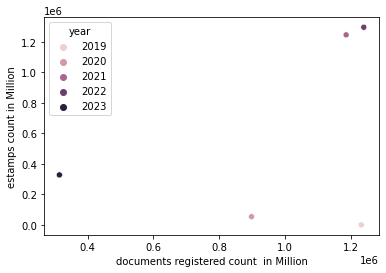

In [51]:
ax=sns.scatterplot(data=comparing, x="documents_registered_cnt", y="estamps_challans_cnt", hue="year")
ax.set(xlabel="documents registered count  in Million",ylabel='estamps count in Million')


Conclusion: As a resul we can see that estamp registration have started in 2020 and count of estamps have been increasing since then,The most significant estamps registiration occured in 2022 with approximate 130k registirations and it surpassed count of documents registered by 4000 registers. So far for in 2023 we do have data only for the 1st quarter of 2023.As a suggestion to the government it is essential to focus on increasing estamps registiraions because it is more efficient also less time consuming.It's also easier to gather data with any missinformation, Government also can provide a daily updated data to its citizens. Lastly it is also essential for the government to prevent its citizens from scammers and digitalization can play huge impact on preventing people from being scammed.

4 Categorizing districts into 3 segments based on their stamp registraion revenue during 2021 to 2022

FIltering data only for years 21-22

In [52]:
years2122=[2021,2022]

In [53]:
y2122=Tl_stamp[Tl_stamp['year'].isin(years2122)]

In [54]:
y2122=pd.DataFrame(y2122)

Resetting the index of dataframe

In [55]:
y2122.index=range(1,len(y2122)+1)

Summing revenue per district

In [56]:
y2122_dis_stamp_rev=y2122.groupby('dist_code')[['estamps_challans_rev']].sum().sort_values(by='estamps_challans_rev',ascending=False)

Dividing revenue into 3 different segments


In [57]:
quantile025=y2122_dis_stamp_rev['estamps_challans_rev'].quantile(0.25)

In [58]:
quantile05=y2122_dis_stamp_rev['estamps_challans_rev'].quantile(0.5)

In [59]:
quantile075=y2122_dis_stamp_rev['estamps_challans_rev'].quantile(0.75)

Using cut to create categories

In [60]:


y2122_dis_stamp_rev['revenue_segments'] = pd.cut(
    y2122_dis_stamp_rev['estamps_challans_rev'],
    bins=[-float("inf"), quantile025, quantile075, float("inf")],
    labels=['Low revenue', 'Average revenue', 'High revenue']
)


In [61]:
y2122_dis_stamp_rev

,estamps_challans_rev,revenue_segments
dist_code,,
15_1,69624637386,High revenue
15_2,41680924859,High revenue
16_1,23902497868,High revenue
17_2,14320890271,High revenue
21_1,4930453019,High revenue
22_1,3652373063,High revenue
23_3,3520679984,High revenue
18_1,2619172847,High revenue
23_1,2615991115,Average revenue


Here I have created 25th,50th,75th percentiles of estamp revenue. Districts that earned less than 25th percentile labaled as low revenue,
Districts that earned more than 25th but less than 50th percentile labeled as Average revenue and Districts which earned more than 75th percentile labeled as High Revenue

5. Investigate whether there is any correlation between vehicle sales and
specific months

In [62]:
Tl_transportation=pd.read_csv('/Users/agajanagamyradov/Downloads/C7_Input Files/dataset/fact_transport.csv')

In [63]:
Tl_transportation.dtypes

dist_code                    object
month                        object
fuel_type_petrol              int64
fuel_type_diesel              int64
fuel_type_electric            int64
fuel_type_others              int64
vehicleClass_MotorCycle       int64
vehicleClass_MotorCar         int64
vehicleClass_AutoRickshaw     int64
vehicleClass_Agriculture      int64
vehicleClass_others           int64
seatCapacity_1_to_3           int64
seatCapacity_4_to_6           int64
seatCapacity_above_6          int64
Brand_new_vehicles            int64
Pre-owned_vehicles            int64
category_Non-Transport        int64
category_Transport            int64
dtype: object

Converting month column to datetime

In [64]:
Tl_transportation['month']=pd.to_datetime(Tl_transportation['month'])

In [65]:
Tl_transportation.dtypes

dist_code                            object
month                        datetime64[ns]
fuel_type_petrol                      int64
fuel_type_diesel                      int64
fuel_type_electric                    int64
fuel_type_others                      int64
vehicleClass_MotorCycle               int64
vehicleClass_MotorCar                 int64
vehicleClass_AutoRickshaw             int64
vehicleClass_Agriculture              int64
vehicleClass_others                   int64
seatCapacity_1_to_3                   int64
seatCapacity_4_to_6                   int64
seatCapacity_above_6                  int64
Brand_new_vehicles                    int64
Pre-owned_vehicles                    int64
category_Non-Transport                int64
category_Transport                    int64
dtype: object

In [66]:
Tl_transportation['year']=Tl_transportation['month'].dt.year

In [67]:
Tl_transportation['month']=Tl_transportation['month'].dt.month

In [68]:
Tl_transportation

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year
0,15_1,4,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,2019
1,18_2,4,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175,2019
2,20_3,4,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144,2019
3,21_3,4,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169,2019
4,21_7,4,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,3,24112,2169,2606,1848,21501,5792,1684,0,1758,22493,7139,1093,26285,4450,27421,3314,2023
1436,14_4,3,996,286,20,67,884,137,75,106,167,1123,219,27,1300,69,1129,240,2023
1437,20_3,3,886,183,71,12,828,146,17,54,107,966,167,19,1060,92,1030,122,2023
1438,23_3,3,1659,472,39,97,1413,289,95,182,288,1829,391,47,2107,160,1889,378,2023


In [69]:
Tl_transportation.set_index('month',inplace=True)

In [70]:
salescorr=Tl_transportation[['dist_code','vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw']]

In [71]:
Tl_transportation.reset_index(inplace=True)

In [72]:
Tl_transportation.set_index('dist_code',inplace=True)

In [73]:
Tl_transportation

,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year
dist_code,,,,,,,,,,,,,,,,,,
15_1,4,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,2019
18_2,4,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175,2019
20_3,4,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144,2019
21_3,4,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169,2019
21_7,4,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16_1,3,24112,2169,2606,1848,21501,5792,1684,0,1758,22493,7139,1093,26285,4450,27421,3314,2023
14_4,3,996,286,20,67,884,137,75,106,167,1123,219,27,1300,69,1129,240,2023
20_3,3,886,183,71,12,828,146,17,54,107,966,167,19,1060,92,1030,122,2023


Checking correlation between month and sales


In [74]:
Tl_transportation.reset_index(inplace=True)

In [75]:
Tl_transportation

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year
0,15_1,4,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,2019
1,18_2,4,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175,2019
2,20_3,4,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144,2019
3,21_3,4,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169,2019
4,21_7,4,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,3,24112,2169,2606,1848,21501,5792,1684,0,1758,22493,7139,1093,26285,4450,27421,3314,2023
1436,14_4,3,996,286,20,67,884,137,75,106,167,1123,219,27,1300,69,1129,240,2023
1437,20_3,3,886,183,71,12,828,146,17,54,107,966,167,19,1060,92,1030,122,2023
1438,23_3,3,1659,472,39,97,1413,289,95,182,288,1829,391,47,2107,160,1889,378,2023


Creating quarters to analyze correlation

In [76]:
Tl_transportation['Quarters']=pd.cut(
    Tl_transportation['month'],
    bins=[Tl_transportation['month'].min()-1,3,6,9,Tl_transportation['month'].max()+1],
    labels=[1,2,3,4]
)

In [77]:
Tl_transportation

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year,Quarters
0,15_1,4,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163,2019,2
1,18_2,4,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175,2019,2
2,20_3,4,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144,2019,2
3,21_3,4,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169,2019,2
4,21_7,4,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,3,24112,2169,2606,1848,21501,5792,1684,0,1758,22493,7139,1093,26285,4450,27421,3314,2023,1
1436,14_4,3,996,286,20,67,884,137,75,106,167,1123,219,27,1300,69,1129,240,2023,1
1437,20_3,3,886,183,71,12,828,146,17,54,107,966,167,19,1060,92,1030,122,2023,1
1438,23_3,3,1659,472,39,97,1413,289,95,182,288,1829,391,47,2107,160,1889,378,2023,1


In [78]:
Tl_transportation['Total_veh_Sales']=Tl_transportation['vehicleClass_MotorCycle']+Tl_transportation['vehicleClass_MotorCar']+Tl_transportation['vehicleClass_AutoRickshaw']+Tl_transportation['vehicleClass_Agriculture']+Tl_transportation['vehicleClass_others']


In [79]:
Tl_transportation

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year,Quarters,Total_veh_Sales
0,15_1,4,17910,3011,76,22,15308,4429,0,4,...,16110,4182,717,19542,1477,19856,1163,2019,2,21019
1,18_2,4,3066,306,6,0,2995,142,49,64,...,3156,189,33,3322,56,3203,175,2019,2,3378
2,20_3,4,1577,215,0,0,1546,79,29,21,...,1683,104,5,1751,41,1648,144,2019,2,1792
3,21_3,4,1961,281,2,0,1939,72,72,48,...,2082,146,16,2209,35,2075,169,2019,2,2244
4,21_7,4,1552,309,0,0,1512,76,69,109,...,1696,145,20,1820,41,1701,160,2019,2,1861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,3,24112,2169,2606,1848,21501,5792,1684,0,...,22493,7139,1093,26285,4450,27421,3314,2023,1,30735
1436,14_4,3,996,286,20,67,884,137,75,106,...,1123,219,27,1300,69,1129,240,2023,1,1369
1437,20_3,3,886,183,71,12,828,146,17,54,...,966,167,19,1060,92,1030,122,2023,1,1152
1438,23_3,3,1659,472,39,97,1413,289,95,182,...,1829,391,47,2107,160,1889,378,2023,1,2267


In [80]:
Dist_sal=Tl_transportation.groupby(['dist_code','Quarters'])[['Total_veh_Sales']].sum()

Created lineplot to compare vehicle sales in different months

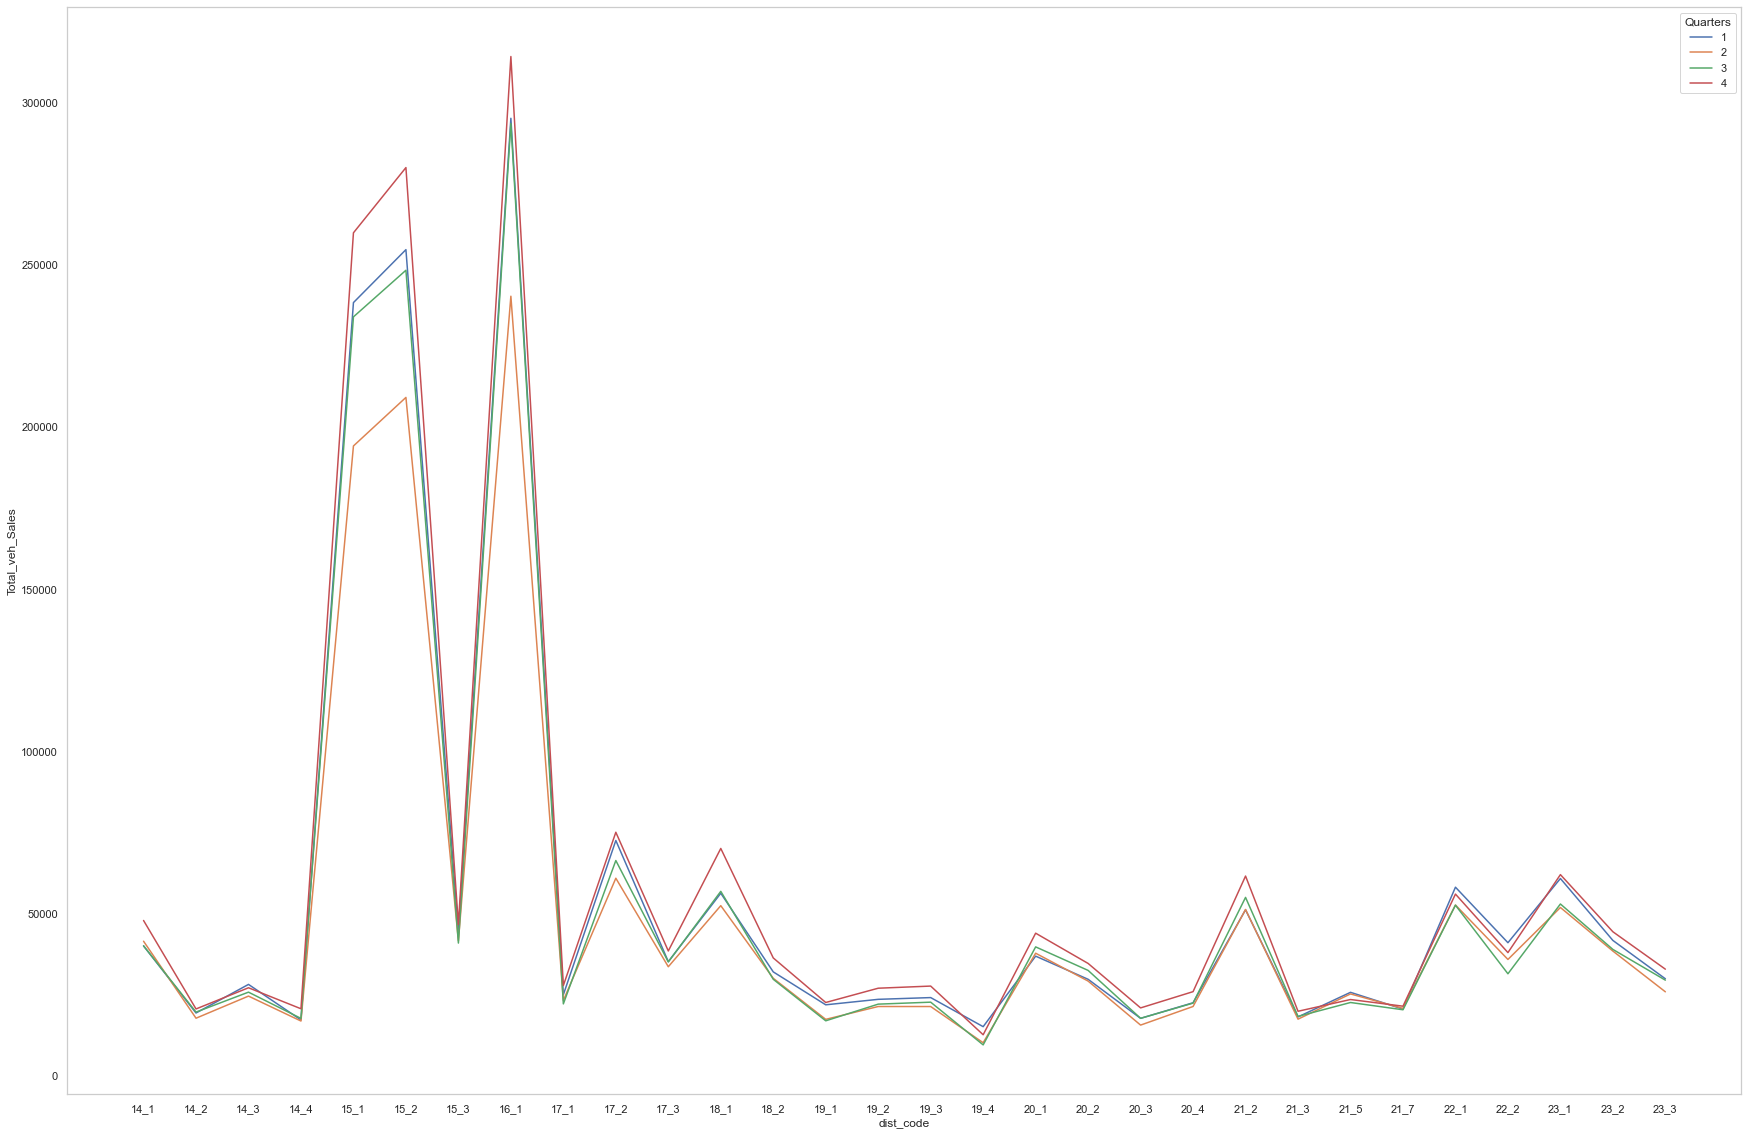

In [110]:
sns.lineplot(data=Dist_sal,x='dist_code',y='Total_veh_Sales',hue='Quarters')
sns.set(rc={'figure.figsize':(35,20)})
sns.set_style("whitegrid", {'axes.grid' : False})


5 Conclusion: Vehicle sales in 4th quarter is higher comparing to other quarters, it is significantly higher in Districts 14_4,15_1,15_2 and 16_1. About sales in different disticts, we can see that in Districts 14_4,15_1,15_2 and 16_1 sales are high in every quarter comparing to other districts

6. How does the distribution of vehicles vary by vehicle class
(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different
districts? Are there any districts with a predominant preference for a
specific vehicle class? Consider FY 2022 for analysis.

In [82]:
year2022=[2022]
Tl_transportation22=Tl_transportation[Tl_transportation['year'].isin(year2022)]

In [83]:
Tl_transportation22

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year,Quarters,Total_veh_Sales
990,23_2,1,2481,499,28,10,2339,208,24,152,...,2761,214,43,2918,100,2709,309,2022,1,3018
991,23_1,1,3822,804,66,235,3540,409,254,331,...,4243,630,54,4761,166,4288,639,2022,1,4927
992,19_3,1,1244,232,25,4,1114,170,36,33,...,1289,179,37,1410,95,1318,187,2022,1,1505
993,15_3,1,2789,507,37,41,2516,395,88,223,...,2883,442,49,3202,172,3144,230,2022,1,3374
994,20_4,1,1242,223,29,1,1151,158,28,38,...,1271,169,55,1391,104,1349,146,2022,1,1495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,21_5,12,518,145,14,27,458,81,37,43,...,571,112,21,654,50,584,120,2022,4,704
1346,22_2,12,885,248,17,102,704,256,117,91,...,868,343,42,1179,74,1056,197,2022,4,1253
1347,19_1,12,448,133,20,3,385,95,20,26,...,481,108,15,568,36,507,97,2022,4,604
1348,18_1,12,1549,280,92,17,1313,398,62,58,...,1462,418,58,1806,132,1770,168,2022,4,1938


In [84]:
Distribution_vehicle=Tl_transportation22.groupby('dist_code')[['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture']].sum()

In [85]:
Distribution_vehicle.reset_index(inplace=True)

In [86]:
melted_dist=pd.melt(Distribution_vehicle,id_vars='dist_code',value_name='Numbers',var_name='Vehicle_class')

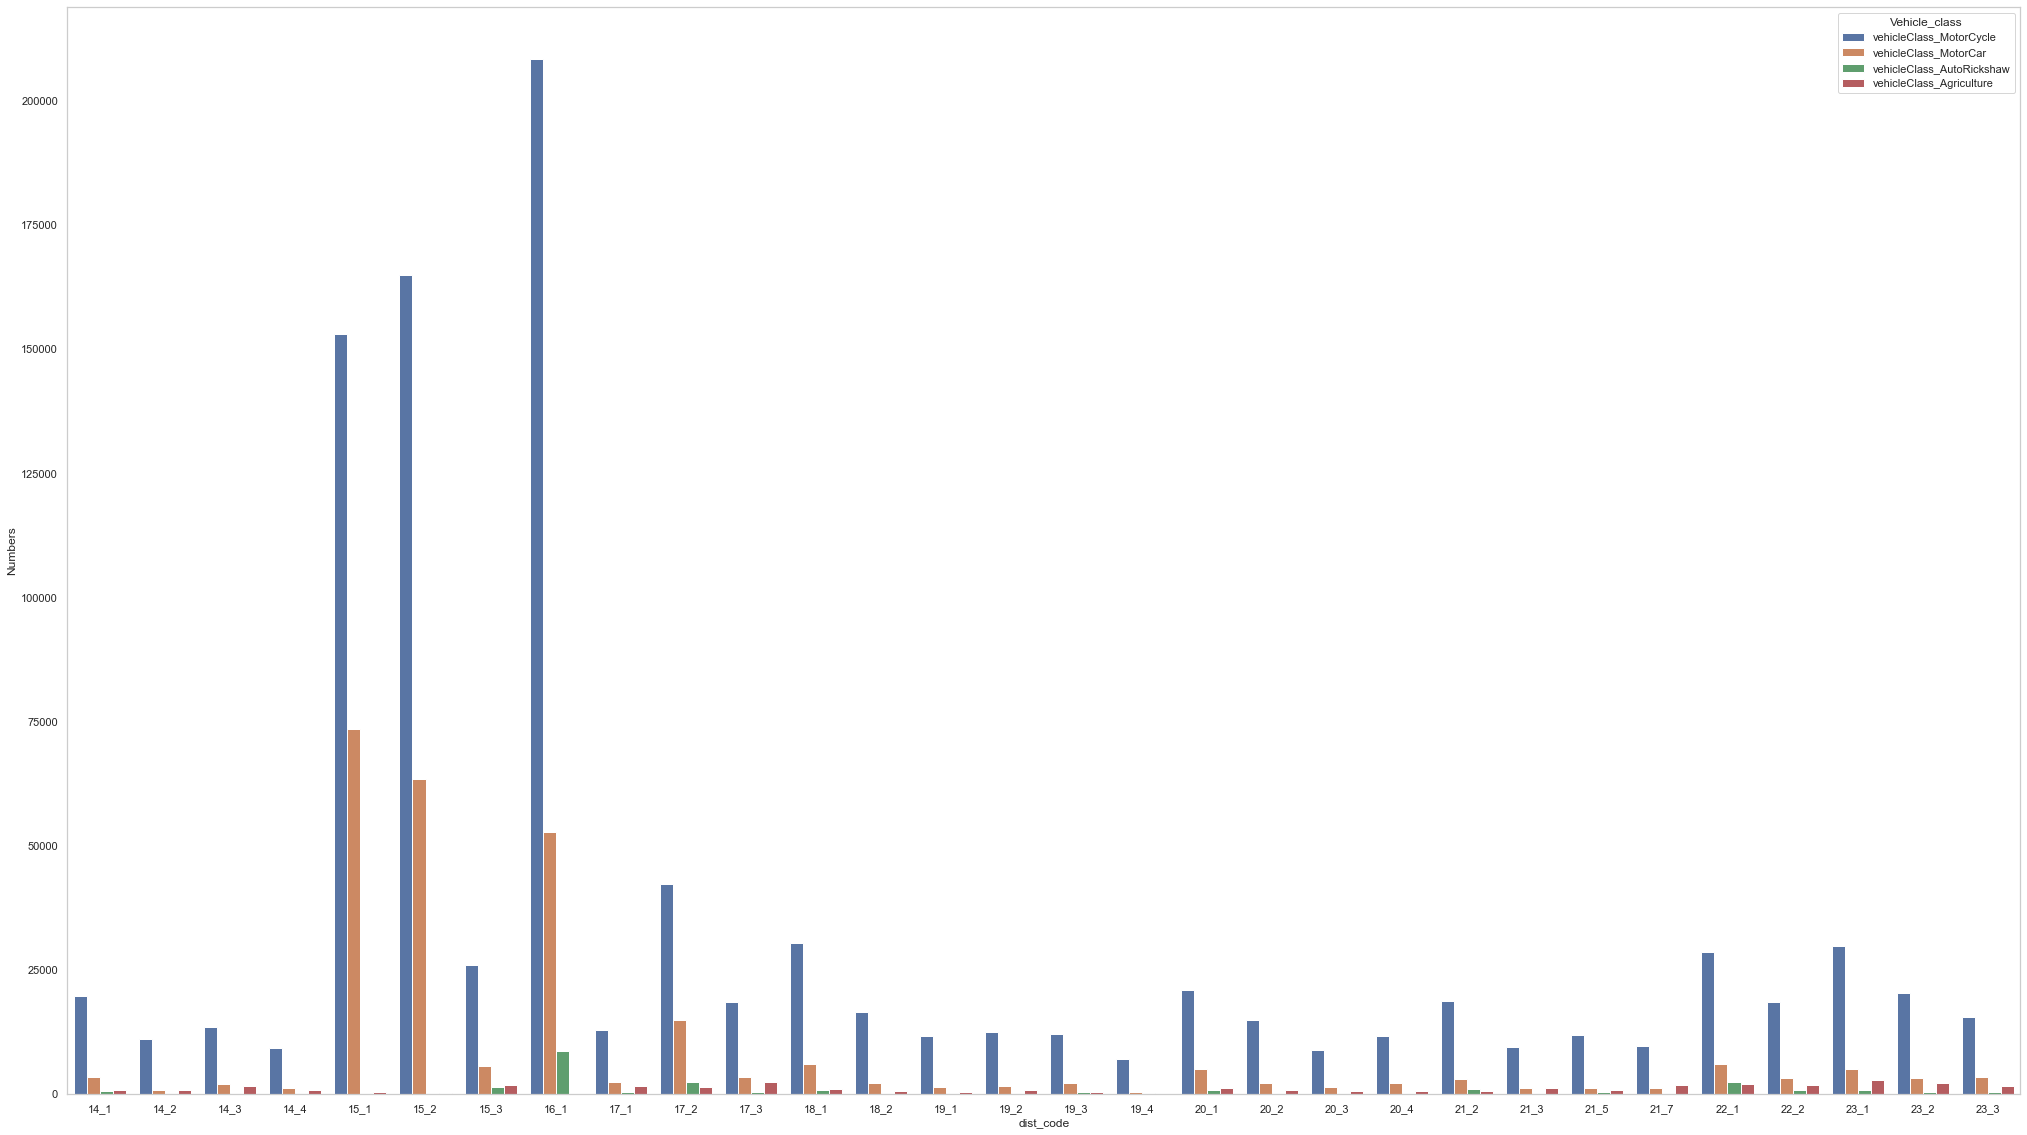

In [87]:
sns.barplot(x='dist_code', y='Numbers', hue='Vehicle_class', data=melted_dist)
sns.set(rc={'figure.figsize':(30,20)})
sns.set_style("whitegrid", {'axes.grid' : False})



Conclusion:Accross all districts, sales of motocycle class surpass sales of other vehicle classes by far. There are 3 districts that have a higher number of sales for motorcycle than other districts. They are 15_1 with approximate 150,000 sales, 15_2 with approximate 160,000 sales, and the most sales belong to district 16_1 with approximate 210,000 sales.

7. List down the top 3 and bottom 3 districts that have shown the highest
and lowest vehicle sales growth during FY 2022 compared to FY
2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [88]:
Tl_transportation

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year,Quarters,Total_veh_Sales
0,15_1,4,17910,3011,76,22,15308,4429,0,4,...,16110,4182,717,19542,1477,19856,1163,2019,2,21019
1,18_2,4,3066,306,6,0,2995,142,49,64,...,3156,189,33,3322,56,3203,175,2019,2,3378
2,20_3,4,1577,215,0,0,1546,79,29,21,...,1683,104,5,1751,41,1648,144,2019,2,1792
3,21_3,4,1961,281,2,0,1939,72,72,48,...,2082,146,16,2209,35,2075,169,2019,2,2244
4,21_7,4,1552,309,0,0,1512,76,69,109,...,1696,145,20,1820,41,1701,160,2019,2,1861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16_1,3,24112,2169,2606,1848,21501,5792,1684,0,...,22493,7139,1093,26285,4450,27421,3314,2023,1,30735
1436,14_4,3,996,286,20,67,884,137,75,106,...,1123,219,27,1300,69,1129,240,2023,1,1369
1437,20_3,3,886,183,71,12,828,146,17,54,...,966,167,19,1060,92,1030,122,2023,1,1152
1438,23_3,3,1659,472,39,97,1413,289,95,182,...,1829,391,47,2107,160,1889,378,2023,1,2267


In [89]:
yr21=[2021]
yr22=[2022]

In [90]:
Tl21=Tl_transportation[Tl_transportation['year'].isin(yr21)]
Tl22=Tl_transportation[Tl_transportation['year'].isin(yr22)]

Group districts for FY21 and FY22

In [91]:
Sal21=Tl21.groupby('dist_code')[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].sum()

In [92]:
Sal22=Tl22.groupby('dist_code')[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].sum()

In [93]:
Sal21['Total']=Sal21['fuel_type_diesel']+Sal21['fuel_type_electric']+Sal21['fuel_type_petrol']


In [94]:
Sal22['Total']=Sal22['fuel_type_diesel']+Sal22['fuel_type_electric']+Sal22['fuel_type_petrol']


Comparing Year22 to Year21

In [95]:
Diff22_21=Sal22-Sal21

In [96]:
Diff22_21

,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,Total
dist_code,,,,
14_1,-12747,-2120,72,-14795
14_2,-3191,-188,55,-3324
14_3,-4588,-580,82,-5086
14_4,-4245,-211,67,-4389
15_1,11637,4913,8535,25085
15_2,-9388,2523,7730,865
15_3,-6455,-37,255,-6237
16_1,-4013,822,12365,9174
17_1,-4157,-647,162,-4642


Creating Top 3

In [97]:
Top3=Diff22_21.sort_values(by='Total',ascending=False).head(3)

In [98]:
Top3.reset_index(inplace=True)

In [99]:
Top3

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,Total
0,15_1,11637,4913,8535,25085
1,16_1,-4013,822,12365,9174
2,20_1,-5086,5863,846,1623


Creating bottom 3

In [100]:
Bottom3=Diff22_21.sort_values(by='Total',ascending=True).head(3)

In [101]:
Bottom3.reset_index(inplace=True)

In [102]:
Bottom3

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,Total
0,21_2,-25381,-4686,295,-29772
1,18_1,-18846,-1519,857,-19508
2,14_1,-12747,-2120,72,-14795


Let's use melt method so we can use barplot to see top 3 districts and which types had an influence

In [103]:
Top3

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,Total
0,15_1,11637,4913,8535,25085
1,16_1,-4013,822,12365,9174
2,20_1,-5086,5863,846,1623


In [104]:
Top3m=Top3.melt(id_vars='dist_code')

In [105]:
Top3m

,dist_code,variable,value
0,15_1,fuel_type_petrol,11637
1,16_1,fuel_type_petrol,-4013
2,20_1,fuel_type_petrol,-5086
3,15_1,fuel_type_diesel,4913
4,16_1,fuel_type_diesel,822
5,20_1,fuel_type_diesel,5863
6,15_1,fuel_type_electric,8535
7,16_1,fuel_type_electric,12365
8,20_1,fuel_type_electric,846
9,15_1,Total,25085


In [106]:
Bot3m=Bottom3.melt(id_vars='dist_code')

In [107]:
Bot3m

,dist_code,variable,value
0,21_2,fuel_type_petrol,-25381
1,18_1,fuel_type_petrol,-18846
2,14_1,fuel_type_petrol,-12747
3,21_2,fuel_type_diesel,-4686
4,18_1,fuel_type_diesel,-1519
5,14_1,fuel_type_diesel,-2120
6,21_2,fuel_type_electric,295
7,18_1,fuel_type_electric,857
8,14_1,fuel_type_electric,72
9,21_2,Total,-29772


creating barplots

<AxesSubplot:xlabel='dist_code', ylabel='value'>

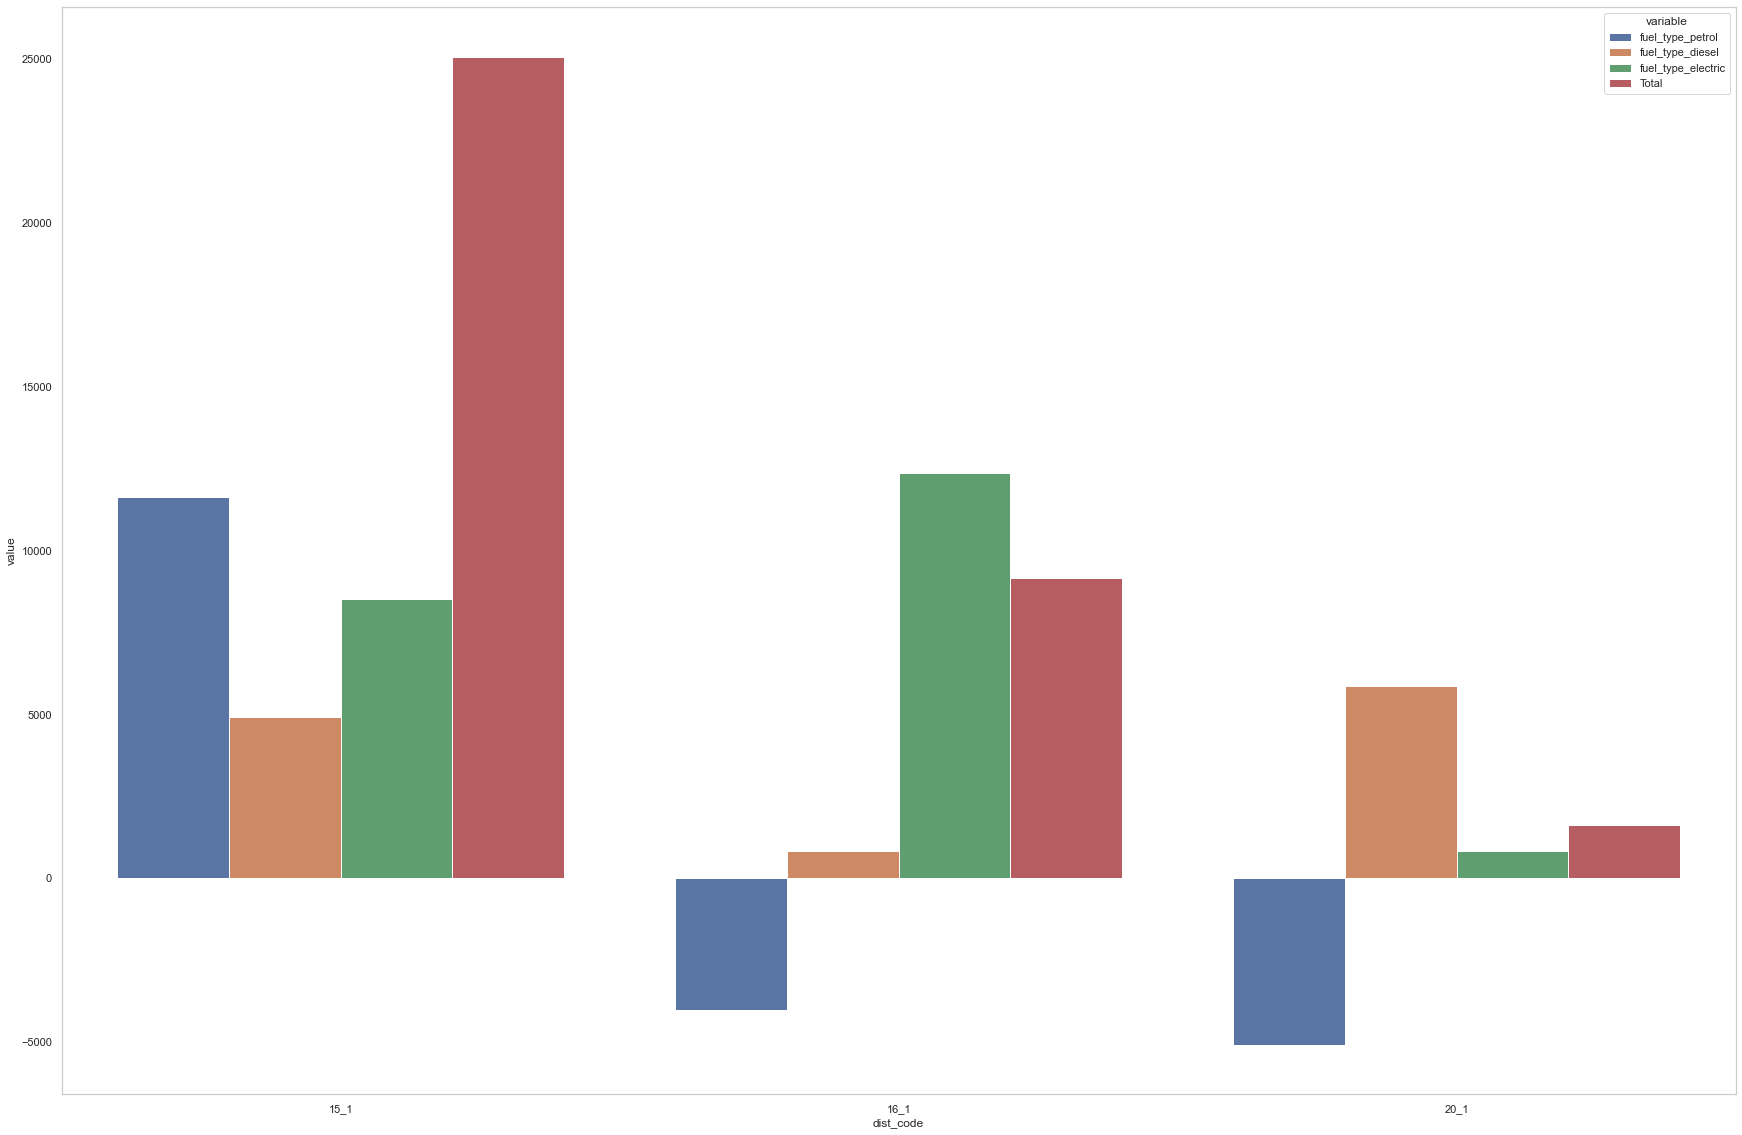

In [108]:

sns.barplot(data=Top3m,x='dist_code',y='value',hue='variable')


For FY2022 comparing to FY2021 Top 3 districts are 15_1 with 25085 sales, 16_1 with 9174 sales and 20_1 with 1623 sales. By looking at our vizualization we can see that sales of ev cars are increasing, while sales of petrol cars in a decline.

<AxesSubplot:xlabel='dist_code', ylabel='value'>

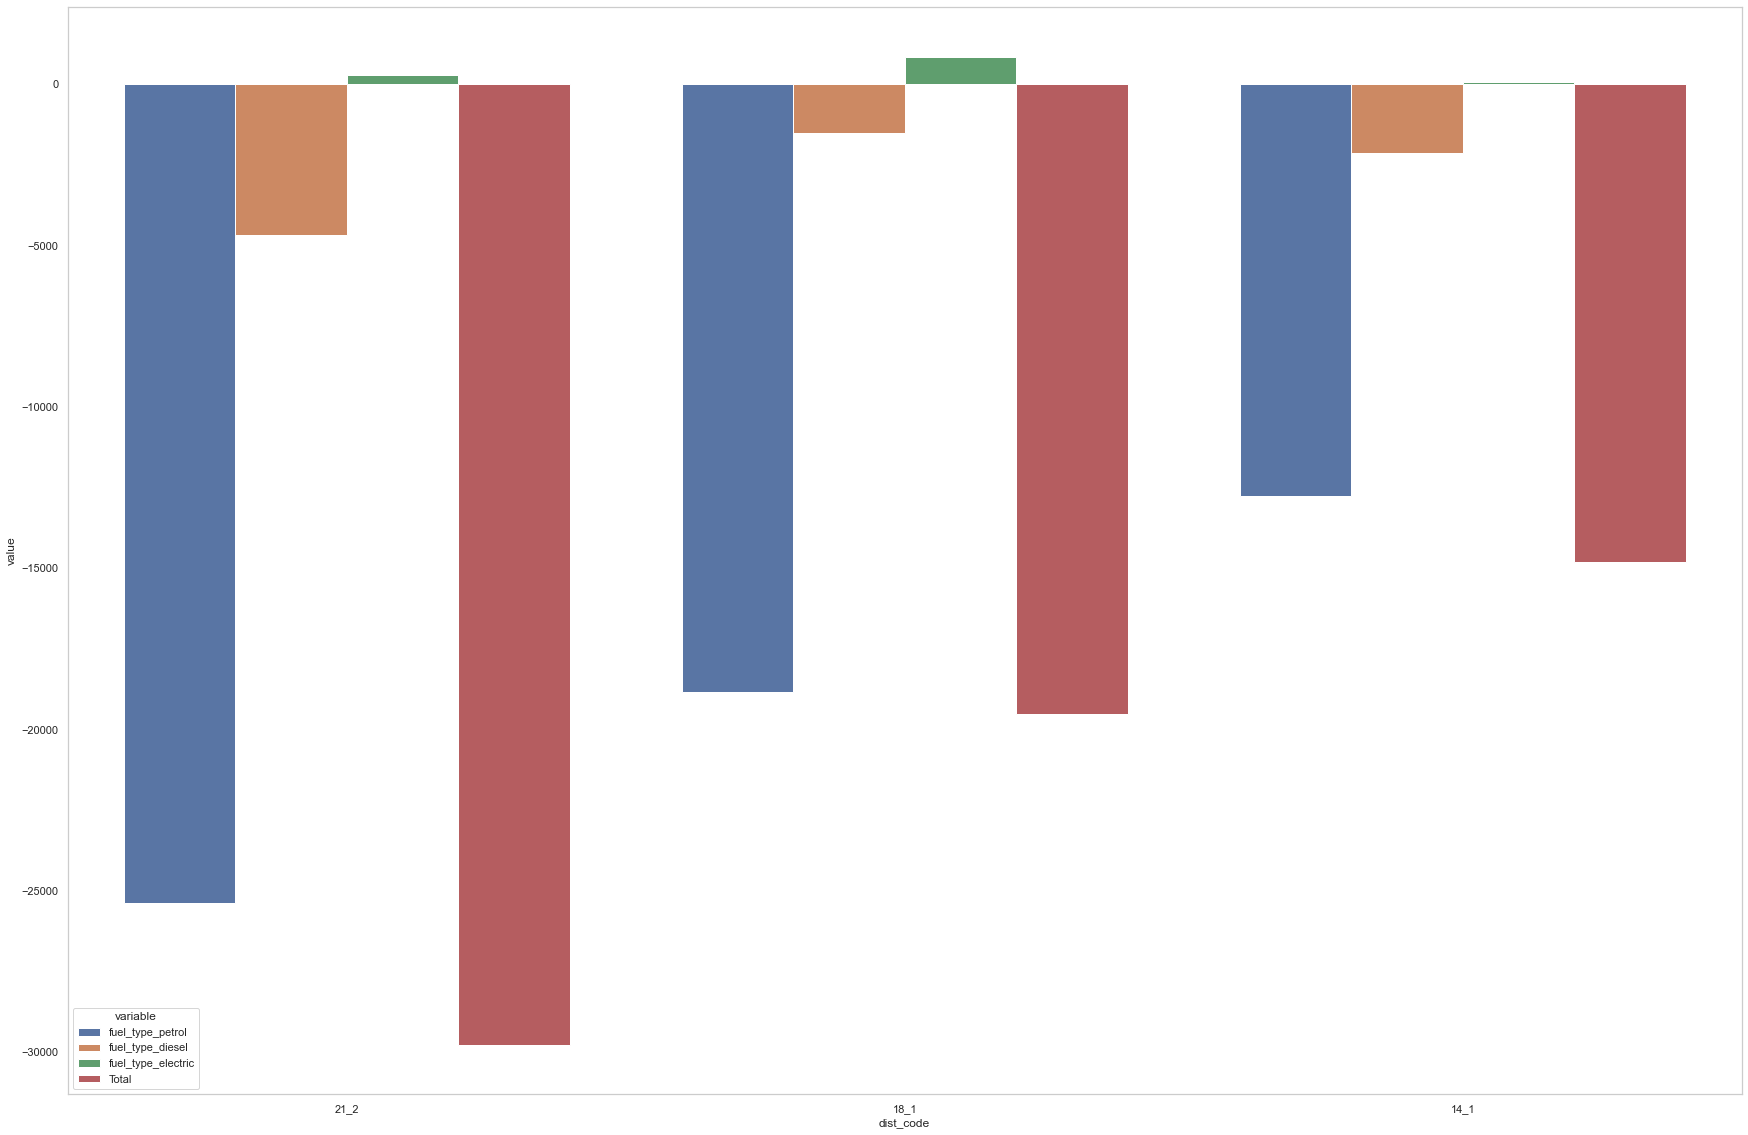

In [109]:
sns.barplot(data=Bot3m,x='dist_code',y='value',hue='variable')


For FY2022 comparing to FY2021 Bottom 3 districts are 21_2 with 29772 less sales, 18_1 with 19508 less sales and 14_1 with 14795 less sales. By looking at our vizualization we can see that sales of ev cars are increasing even though numbers of petrol and diesel cars are extremely low in sales.Another thing we should have a look is sales of petrol cars are in a huge decline.

Ts-Ipass

Data cleaning of Tl-Ipass

In [111]:
Tl_Ipass

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,20_4,01-03-2023,Engineering,0.1200,3
5749,20_4,01-03-2023,Food Processing,0.7509,9
5750,20_4,01-03-2023,Others,7.7500,10
5751,21_1,01-03-2023,Food Processing,0.3200,9


In [113]:
Tl_Ipass.dtypes

dist_code               object
month                   object
sector                  object
investment in cr       float64
number_of_employees      int64
dtype: object

In [114]:
Tl_Ipass['month']=pd.to_datetime(Tl_Ipass['month'])

In [115]:
Tl_Ipass.dtypes

dist_code                      object
month                  datetime64[ns]
sector                         object
investment in cr              float64
number_of_employees             int64
dtype: object

In [116]:
Tl_Ipass['year']=Tl_Ipass['month'].dt.year

In [117]:
Tl_Ipass

,dist_code,month,sector,investment in cr,number_of_employees,year
0,14_1,2019-01-04,Engineering,2.3200,15,2019
1,19_1,2019-01-04,Engineering,0.6250,13,2019
2,20_3,2019-01-04,Wood and Leather,0.2000,8,2019
3,20_3,2019-01-04,Textiles,0.2675,27,2019
4,21_5,2019-01-04,Electrical and Electronic Products,0.1200,5,2019
...,...,...,...,...,...,...
5748,20_4,2023-01-03,Engineering,0.1200,3,2023
5749,20_4,2023-01-03,Food Processing,0.7509,9,2023
5750,20_4,2023-01-03,Others,7.7500,10,2023
5751,21_1,2023-01-03,Food Processing,0.3200,9,2023


In [118]:
FY22=[2022]

In [119]:
Ts22=Tl_Ipass[Tl_Ipass['year'].isin(FY22)]

In [121]:
Ts22.index=range(1,len(Ts22)+1)

In [122]:
Ts22

,dist_code,month,sector,investment in cr,number_of_employees,year
1,15_2,2022-01-01,Paper and Printing,1.9100,15,2022
2,15_2,2022-01-01,"Cement, Cement & Concrete Products, Fly Ash Br...",0.2400,12,2022
3,15_2,2022-01-01,Electrical and Electronic Products,1.4000,10,2022
4,15_2,2022-01-01,Engineering,5.3400,238,2022
5,15_2,2022-01-01,Food Processing,0.2000,5,2022
...,...,...,...,...,...,...
1489,21_1,2022-01-12,Others,2.5000,25,2022
1490,14_3,2022-01-12,Pharmaceuticals and Chemicals,0.8484,50,2022
1491,21_5,2022-01-12,Others,0.2500,10,2022
1492,14_3,2022-01-12,Textiles,2.1940,30,2022


 List down the top 5 sectors that have witnessed the most significant
investments in FY 2022.

In [123]:
Ts22

,dist_code,month,sector,investment in cr,number_of_employees,year
1,15_2,2022-01-01,Paper and Printing,1.9100,15,2022
2,15_2,2022-01-01,"Cement, Cement & Concrete Products, Fly Ash Br...",0.2400,12,2022
3,15_2,2022-01-01,Electrical and Electronic Products,1.4000,10,2022
4,15_2,2022-01-01,Engineering,5.3400,238,2022
5,15_2,2022-01-01,Food Processing,0.2000,5,2022
...,...,...,...,...,...,...
1489,21_1,2022-01-12,Others,2.5000,25,2022
1490,14_3,2022-01-12,Pharmaceuticals and Chemicals,0.8484,50,2022
1491,21_5,2022-01-12,Others,0.2500,10,2022
1492,14_3,2022-01-12,Textiles,2.1940,30,2022


In [129]:
Top5investment=Ts22.groupby('sector')[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False).head(5)

In [133]:
Top5investment

,investment in cr
sector,
"Real Estate,Industrial Parks and IT Buildings",3990.2522
Plastic and Rubber,3699.1197
Pharmaceuticals and Chemicals,2649.1294
Solar and Other Renewable Energy,2201.5980
Beverages,1848.1920


<AxesSubplot:ylabel='sector'>

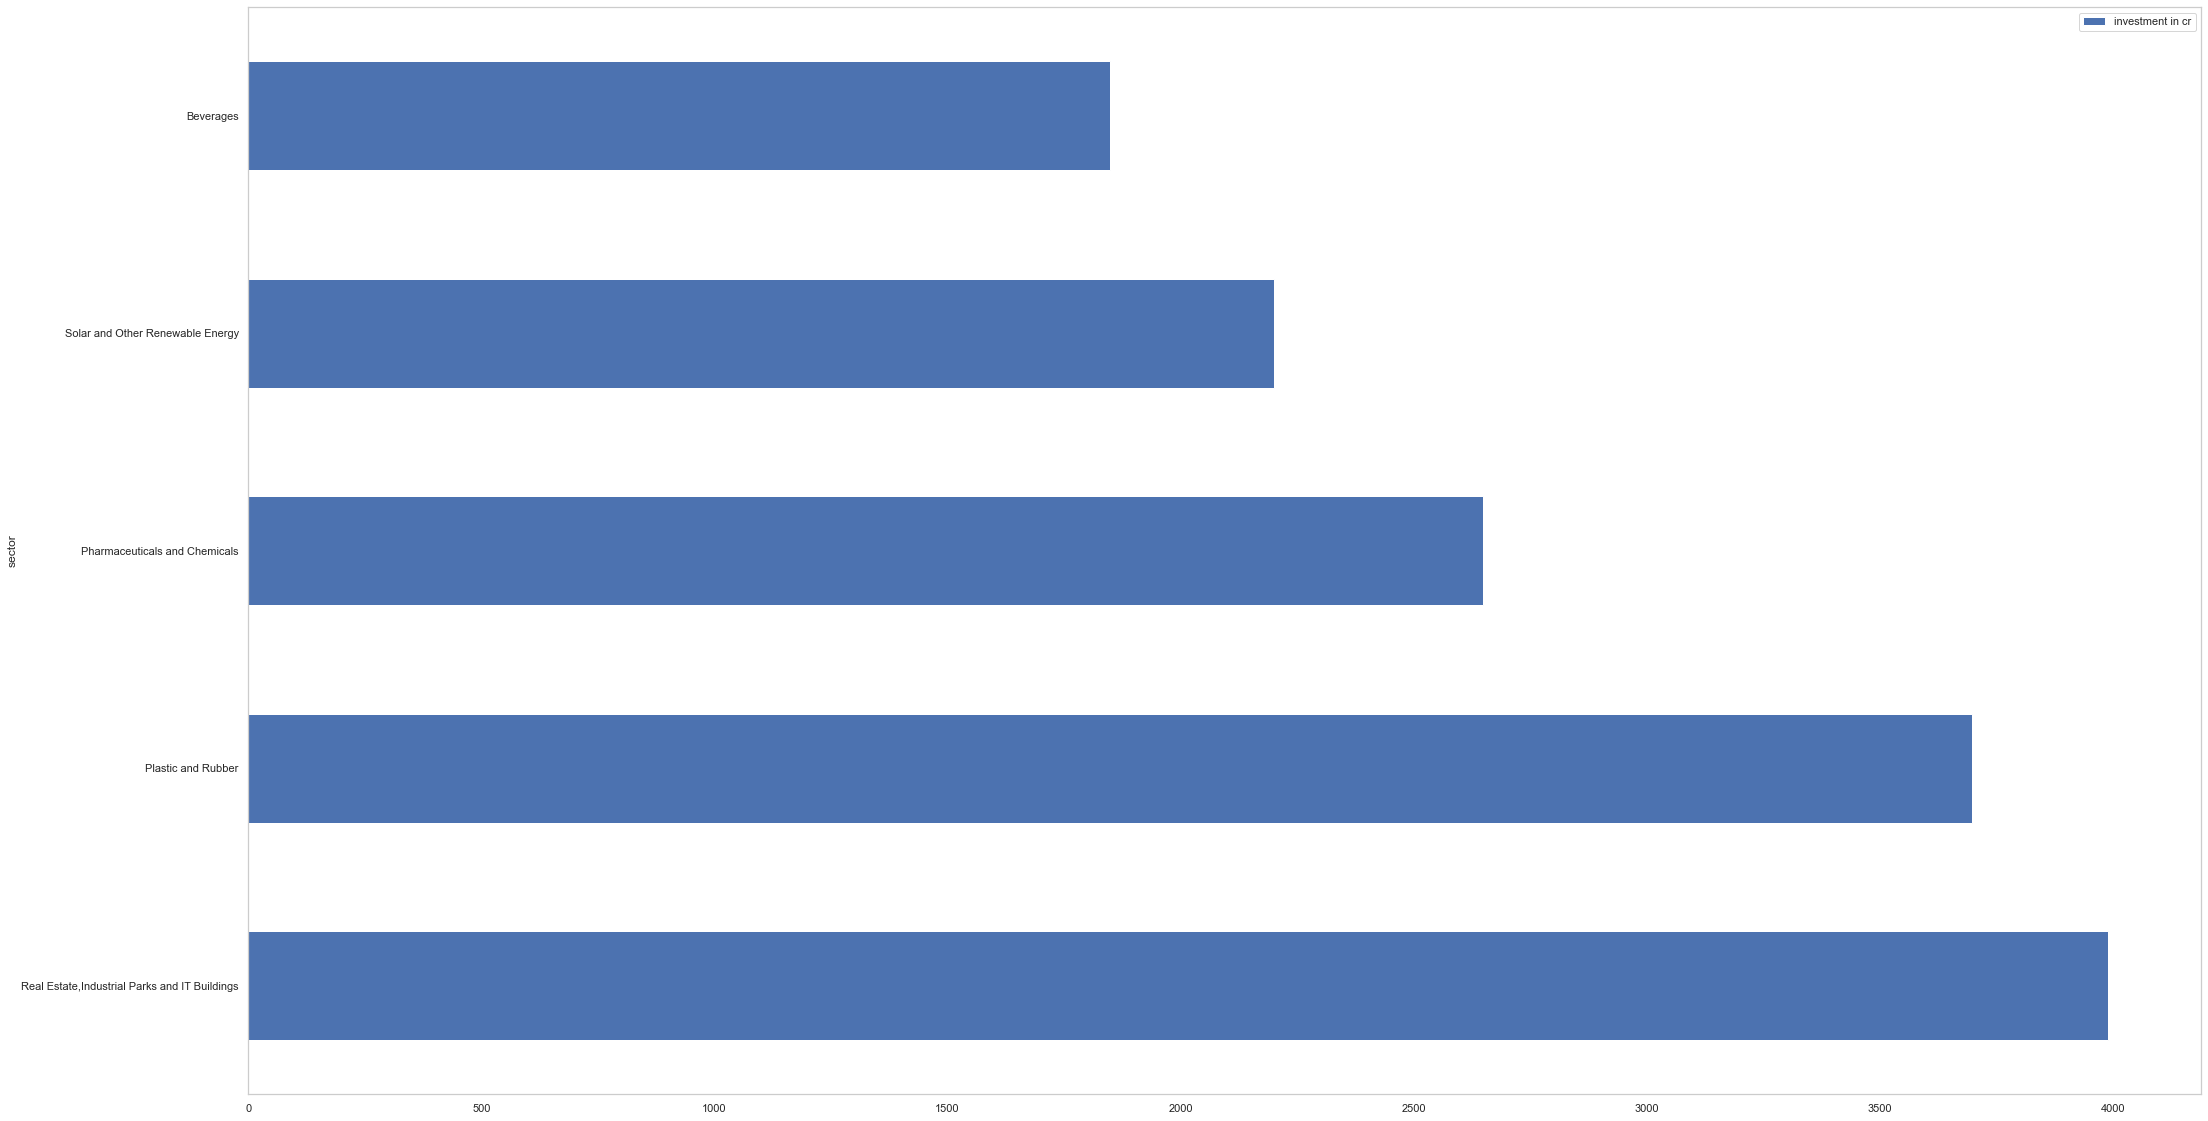

In [198]:
Top5investment.plot(kind='barh')

The Top 5 sectors are:
1.Real Estate,Industrial Parks and IT Buildings:3990.2522
2.Plastic and Rubber:3699.1197
3.Pharmaceuticals and Chemicals:2649.1294
4.Solar and Other Renewable Energy:2201.5980
5.Beverages:1848.1920

9. List down the top 3 districts that have attracted the most significant
sector investments during FY 2019 to 2022? What factors could have
led to the substantial investments in these particular districts?

In [135]:
TL_19to22=Tl_Ipass[Tl_Ipass['year'].isin(years1922)]

In [138]:
TL_19to22.groupby('dist_code')[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False).head(3)Top3dist=

In [139]:
Top3dist

,investment in cr
dist_code,
15_1,40984.2759
15_2,9987.2529
17_2,8955.4081


15_1,15_2,17_2 are top 3 districts with the most investment from years 2019 to 2022

In [146]:
invest=TL_19to22.groupby(['dist_code','sector'])[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False)

In [150]:
invest.reset_index(inplace=True)

In [176]:
invest

,dist_code,sector,investment in cr
0,15_1,"Real Estate,Industrial Parks and IT Buildings",28970.2729
1,20_4,"Fertlizers Organic and Inorganic,Pesticides,In...",5254.2800
2,15_1,Plastic and Rubber,4390.2628
3,15_2,Pharmaceuticals and Chemicals,3823.8972
4,17_2,Pharmaceuticals and Chemicals,3494.7198
...,...,...,...
432,21_6,Beverages,0.0700
433,18_2,Plastic and Rubber,0.0600
434,20_2,Electrical and Electronic Products,0.0500
435,22_2,Electrical and Electronic Products,0.0500


In [177]:
Top_3dit=['15_1','15_2','17_2']

In [186]:
Top3dis_sector=invest[invest['dist_code'].isin(Top_3dit)]

<AxesSubplot:xlabel='dist_code', ylabel='investment in cr'>

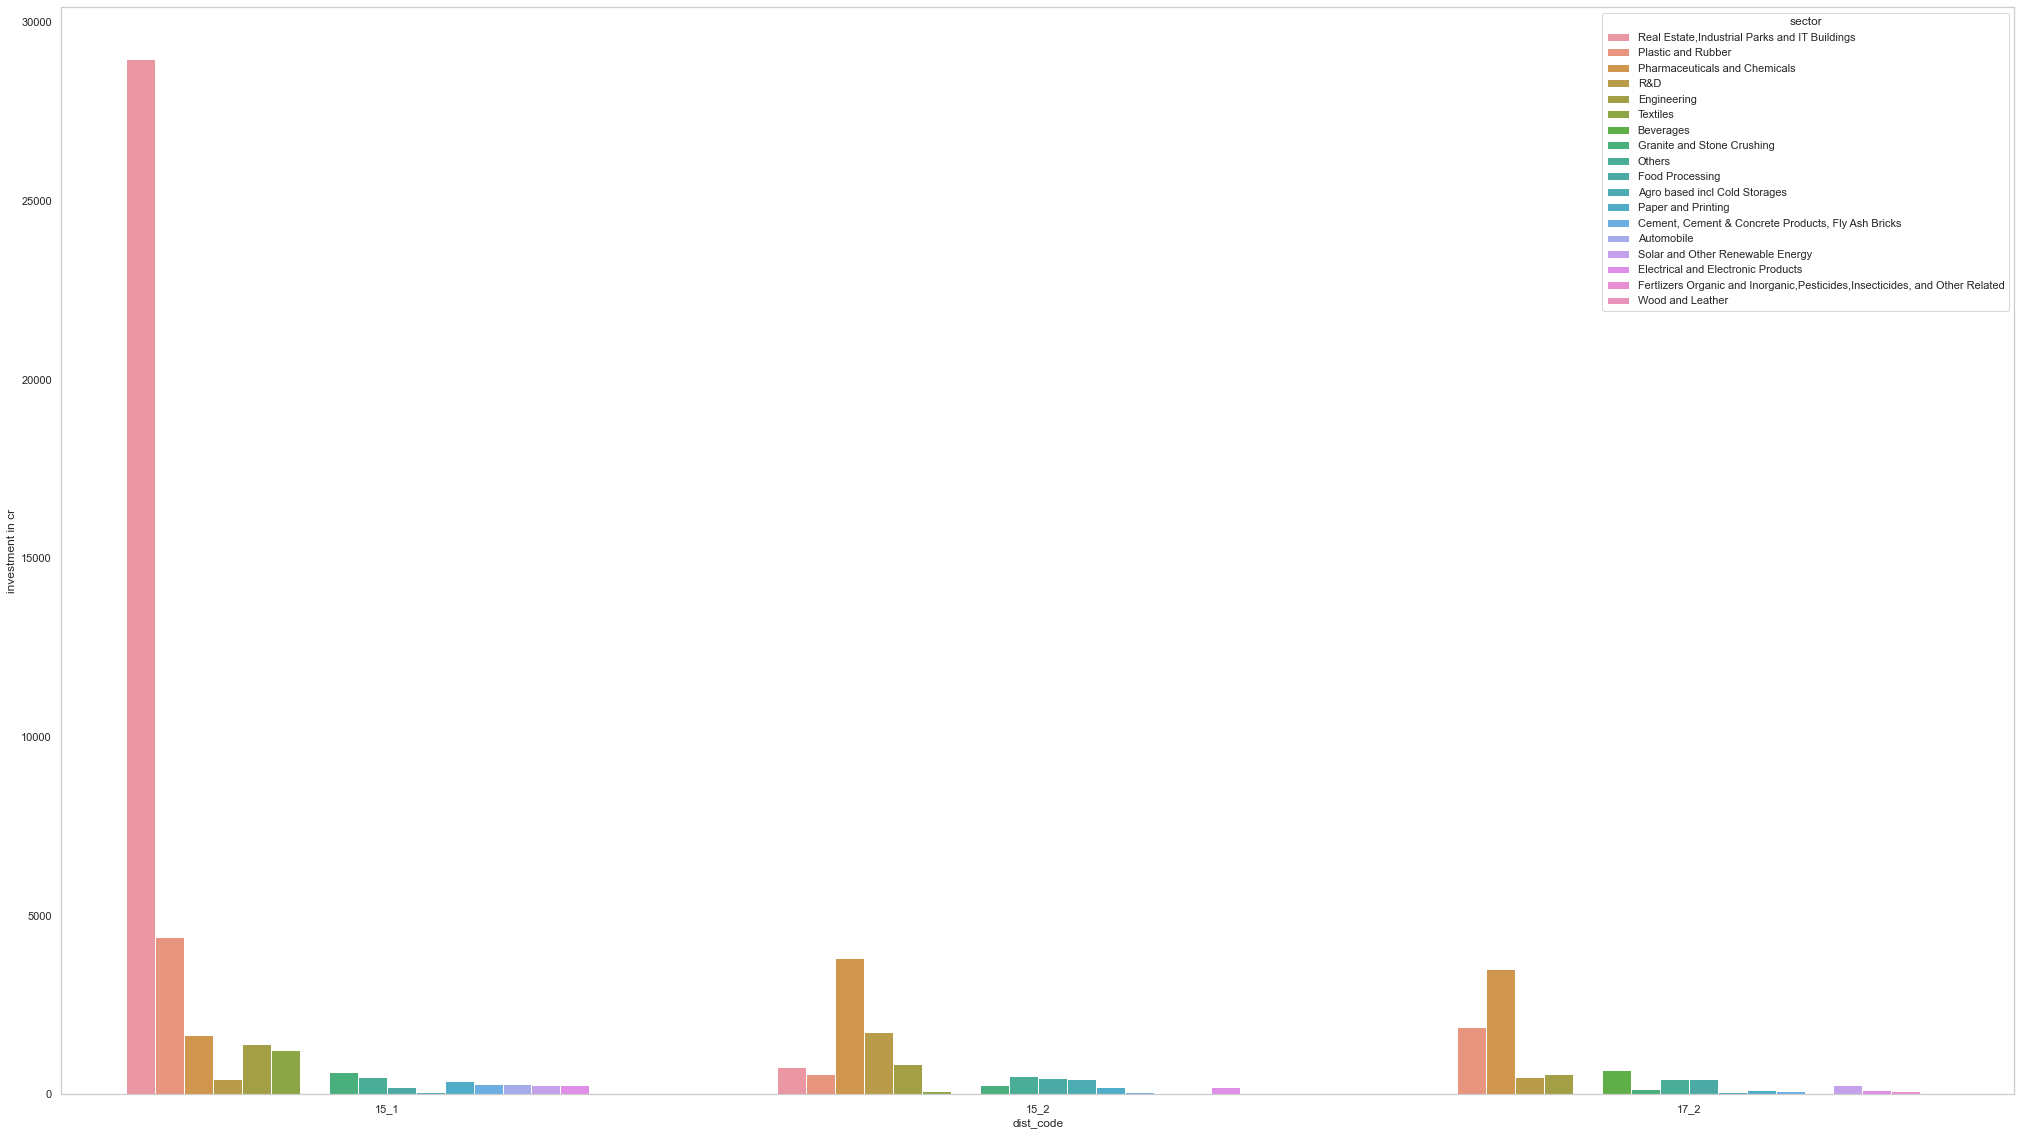

In [197]:
sns.barplot(data=Top3dis_sector,x='dist_code',y='investment in cr',hue='sector')

These are sectores that have invested the most in top 3 districts in investments:
1.15_1 have the most investments in Real Estate
2.15_2 have the most investments in Pharmaceuticals and Chemicals
3.17_2 have the most investments in Plastic and Rubber

10Is there any relationship between district investments, vehicles
sales and stamps revenue within the same district between FY 2021
and 2022?

In [201]:
Tl_stamp.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,year
0,14_1,2019-04-01,4533,59236363,0,0,2019
1,17_3,2019-04-01,4151,41508762,0,0,2019
2,20_3,2019-04-01,2116,23674170,0,0,2019
3,21_5,2019-04-01,1089,15915285,0,0,2019
4,23_1,2019-04-01,6133,82593256,0,0,2019


In [202]:
Tl_transportation.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,...,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport,year,Quarters,Total_veh_Sales
0,15_1,4,17910,3011,76,22,15308,4429,0,4,...,16110,4182,717,19542,1477,19856,1163,2019,2,21019
1,18_2,4,3066,306,6,0,2995,142,49,64,...,3156,189,33,3322,56,3203,175,2019,2,3378
2,20_3,4,1577,215,0,0,1546,79,29,21,...,1683,104,5,1751,41,1648,144,2019,2,1792
3,21_3,4,1961,281,2,0,1939,72,72,48,...,2082,146,16,2209,35,2075,169,2019,2,2244
4,21_7,4,1552,309,0,0,1512,76,69,109,...,1696,145,20,1820,41,1701,160,2019,2,1861


In [203]:
Tl_Ipass.head()

,dist_code,month,sector,investment in cr,number_of_employees,year
0,14_1,2019-01-04,Engineering,2.3200,15,2019
1,19_1,2019-01-04,Engineering,0.6250,13,2019
2,20_3,2019-01-04,Wood and Leather,0.2000,8,2019
3,20_3,2019-01-04,Textiles,0.2675,27,2019
4,21_5,2019-01-04,Electrical and Electronic Products,0.1200,5,2019


In [218]:
merge=Tl_stamp.merge(Tl_transportation,how='inner',on='dist_code',suffixes=('_stamp','_trans'))

In [220]:
merge=merge.merge(Tl_Ipass,on='dist_code',how='inner')

In [241]:
merge=merge[merge['year_stamp'].isin(years2122)]

In [242]:
merge.columns

Index(['dist_code', 'month_stamp', 'documents_registered_cnt',
       'documents_registered_rev', 'estamps_challans_cnt',
       'estamps_challans_rev', 'year_stamp', 'month_trans', 'fuel_type_petrol',
       'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others',
       'vehicleClass_MotorCycle', 'vehicleClass_MotorCar',
       'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture',
       'vehicleClass_others', 'seatCapacity_1_to_3', 'seatCapacity_4_to_6',
       'seatCapacity_above_6', 'Brand_new_vehicles', 'Pre-owned_vehicles',
       'category_Non-Transport', 'category_Transport', 'year_trans',
       'Quarters', 'Total_veh_Sales', 'month', 'sector', 'investment in cr',
       'number_of_employees', 'year'],
      dtype='object')

In [244]:
distcorr=merge[['dist_code','Total_veh_Sales','estamps_challans_rev','investment in cr']]

In [245]:
distcorr.corr()

,Total_veh_Sales,estamps_challans_rev,investment in cr
Total_veh_Sales,1.000000,0.822567,0.058749
estamps_challans_rev,0.822567,1.000000,0.081646
investment in cr,0.058749,0.081646,1.000000


Conclusion: we can say that There is high relationship between Vehicle sales and estamps revenue as correlation between them is 
0.82. It means increase in revenue in one effects each other. Unfortunaly investments has a poor relationship with both Vehicle sales revenue and estamps revenue

11. Are there any particular sectors that have shown substantial
investment in multiple districts between FY 2021 and 2022?

In [246]:
years2122

[2021, 2022]

In [248]:
Tl_Ipass2122=Tl_Ipass[Tl_Ipass['year'].isin(years2122)]

In [251]:
Tl_Ipass2122

,dist_code,month,sector,investment in cr,number_of_employees,year
2381,15_2,2021-01-01,Granite and Stone Crushing,0.2500,5,2021
2382,20_1,2021-01-01,Agro based incl Cold Storages,0.8100,28,2021
2383,20_3,2021-01-01,Agro based incl Cold Storages,1.7250,63,2021
2384,19_1,2021-01-01,"Cement, Cement & Concrete Products, Fly Ash Br...",0.0700,5,2021
2385,20_2,2021-01-01,Agro based incl Cold Storages,2.5765,60,2021
...,...,...,...,...,...,...
5412,21_1,2022-01-12,Others,2.5000,25,2022
5413,14_3,2022-01-12,Pharmaceuticals and Chemicals,0.8484,50,2022
5414,21_5,2022-01-12,Others,0.2500,10,2022
5415,14_3,2022-01-12,Textiles,2.1940,30,2022


In [275]:
sectors=Tl_Ipass2122.groupby(['dist_code','sector'])[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False)

In [276]:
sectors.reset_index(inplace=True)

In [277]:
sectors

,dist_code,sector,investment in cr
0,15_1,"Real Estate,Industrial Parks and IT Buildings",5134.5260
1,15_1,Plastic and Rubber,4254.6698
2,17_2,Pharmaceuticals and Chemicals,2807.8076
3,15_2,Pharmaceuticals and Chemicals,1936.9043
4,15_2,R&D,1468.0206
...,...,...,...
383,23_2,Wood and Leather,0.0800
384,22_1,"Fertlizers Organic and Inorganic,Pesticides,In...",0.0800
385,18_2,Beverages,0.0700
386,15_3,"Fertlizers Organic and Inorganic,Pesticides,In...",0.0650


In [296]:
sectors['sector'].head(20).value_counts()

Pharmaceuticals and Chemicals                         8
Plastic and Rubber                                    2
Engineering                                           2
Real Estate,Industrial Parks and IT Buildings         1
R&D                                                   1
Beverages                                             1
Solar and Other Renewable Energy                      1
Paper and Printing                                    1
Cement, Cement & Concrete Products, Fly Ash Bricks    1
Granite and Stone Crushing                            1
Agro based incl Cold Storages                         1
Name: sector, dtype: int64

conclusion: By looking at the our visualization we can be sure that Pharmaceuticals and Chemicals investment sector is the highest invested sector in most of the districts.

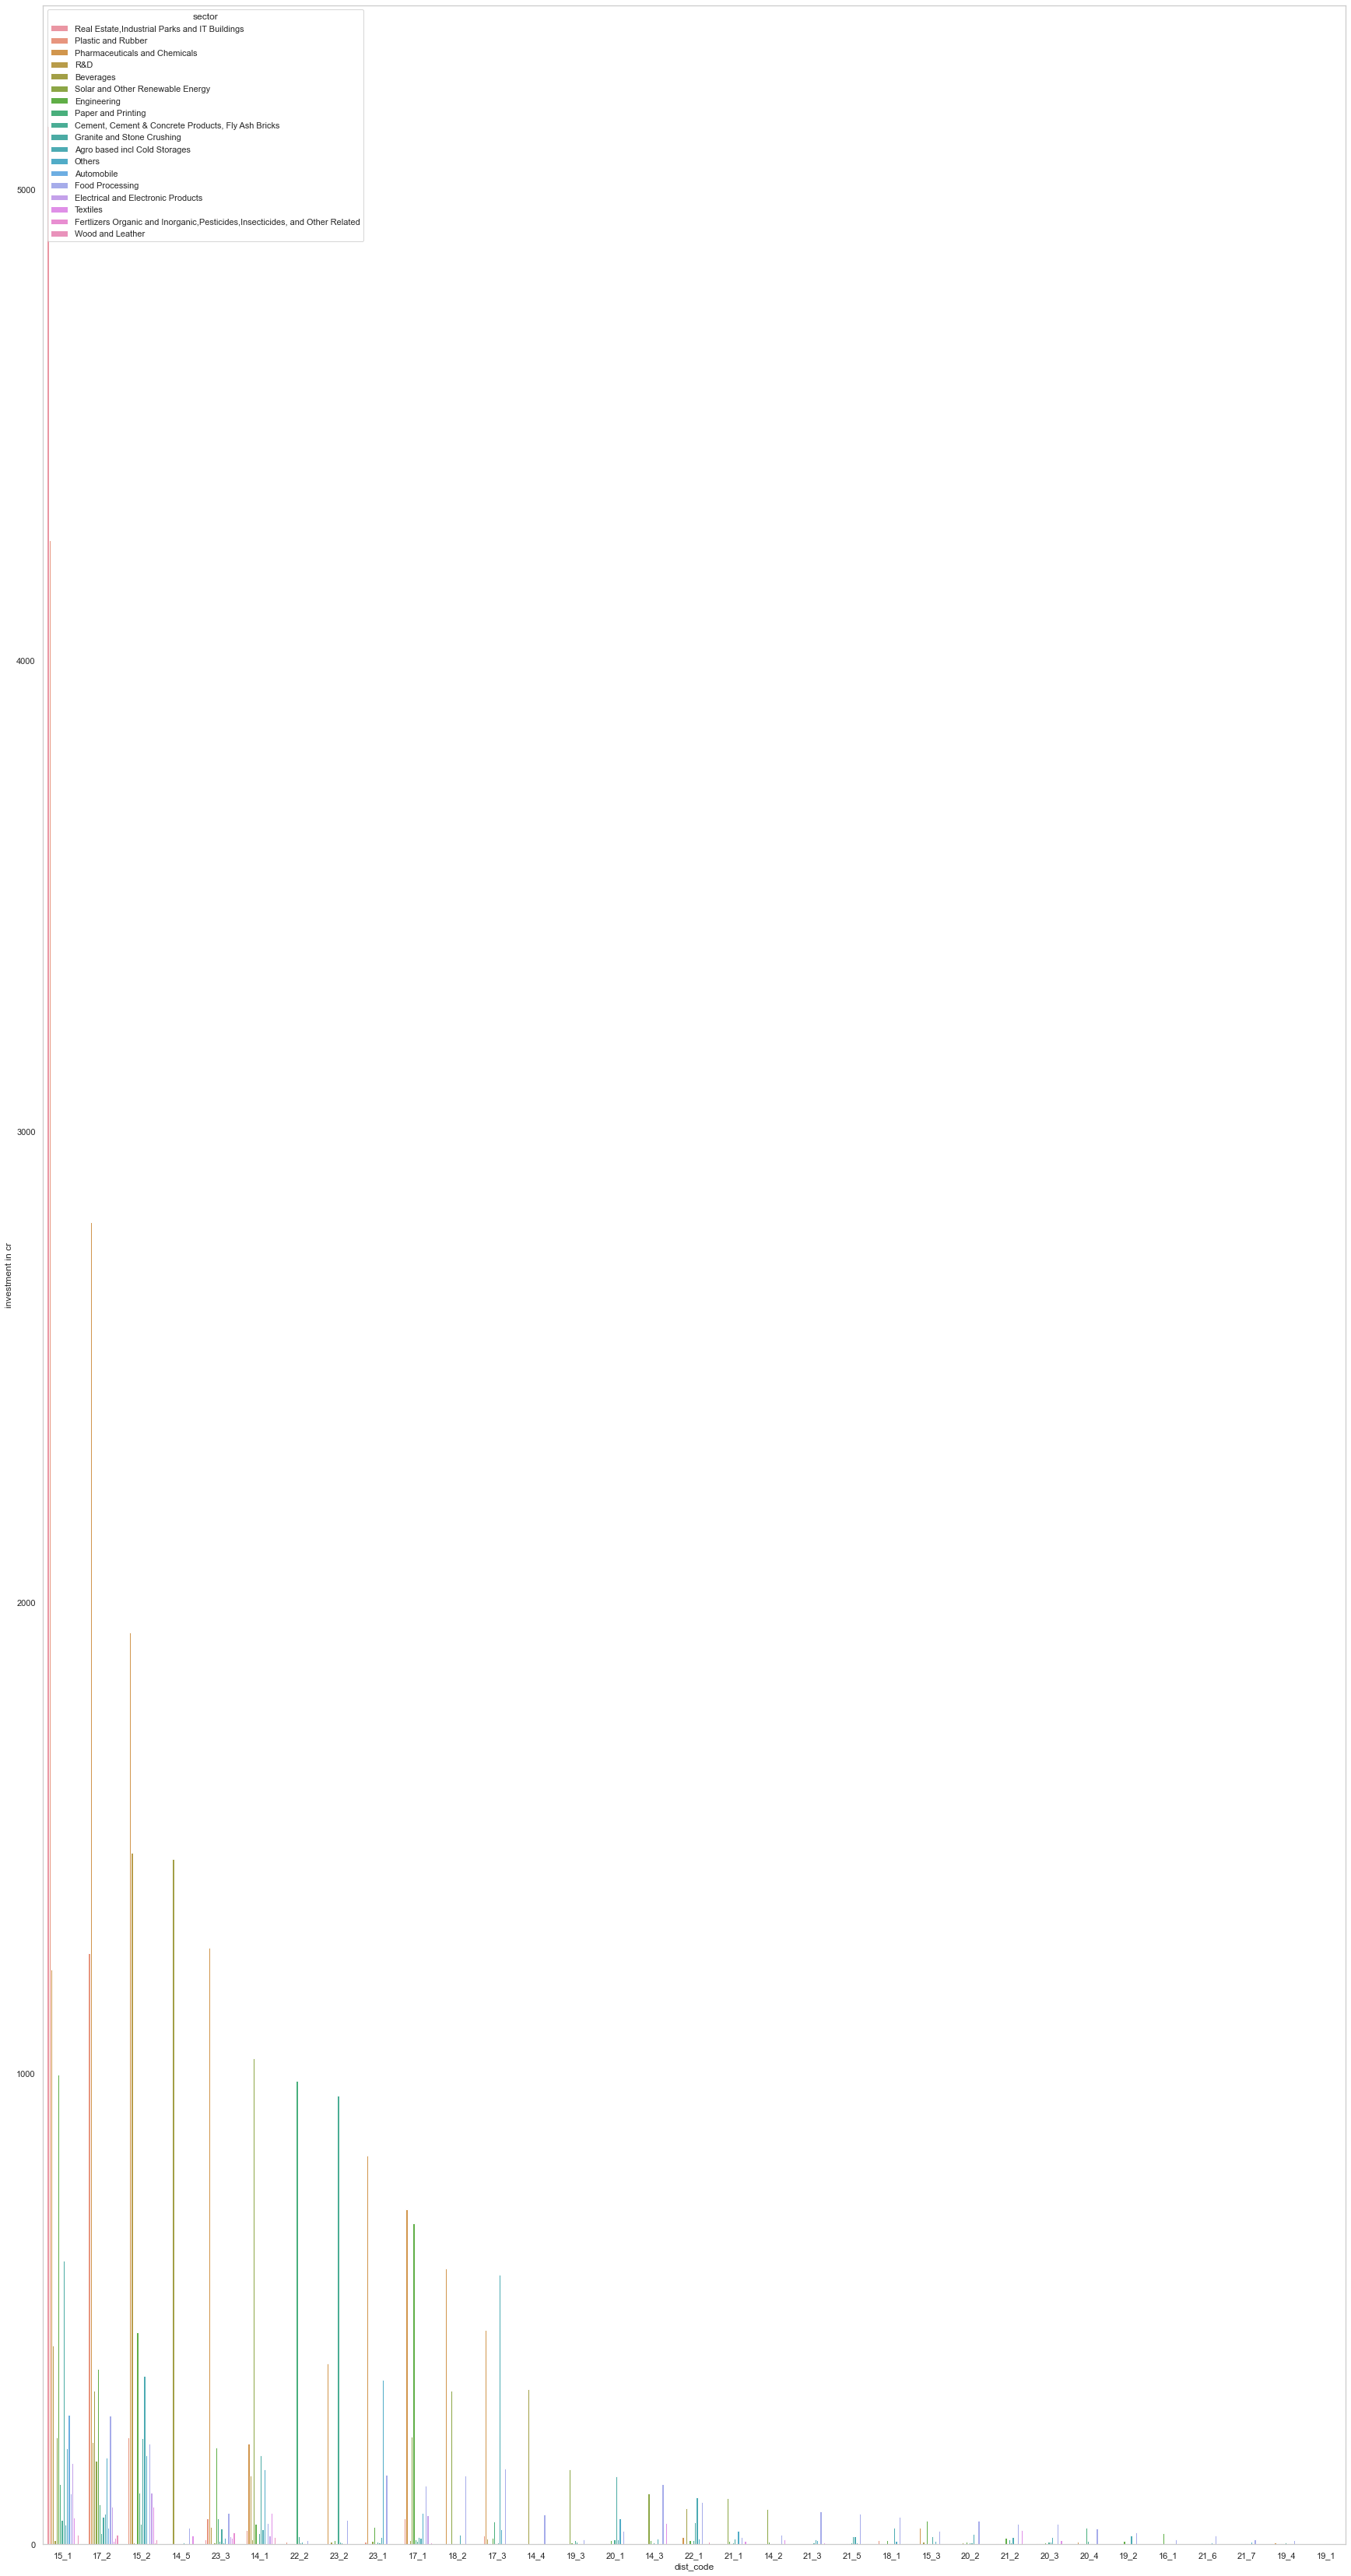

In [286]:
sns.barplot(data=sectors,x='dist_code',y='investment in cr',hue='sector')
sns.set(rc={'figure.figsize':(30,20)})


12. Can we identify any seasonal patterns or cyclicality in the
investment trends for specific sectors? Do certain sectors
experience higher investments during particular months?

In [306]:
Tl_Ipass=pd.read_csv('/Users/agajanagamyradov/Downloads/C7_Input Files/dataset/fact_TS_iPASS.csv')

In [309]:
Tl_Ipass['month']=pd.to_datetime(Tl_Ipass['month'])

In [315]:
Tl_Ipass['month'].dt.month.value_counts()

1    5753
Name: month, dtype: int64

Unfortunately all of datas recored in january months, so we can analyse for years to see if some sectors had more investments during over period of time

In [327]:
Tl_Ipass['year']= Tl_Ipass['month'].dt.year

In [338]:
Tl_Ipass['year'].value_counts()

2021    1543
2022    1493
2020    1368
2019    1013
2023     336
Name: year, dtype: int64

sector investments over the years

In [330]:
Tl_Ipass

,dist_code,month,sector,investment in cr,number_of_employees,year
0,14_1,2019-01-04,Engineering,2.3200,15,2019
1,19_1,2019-01-04,Engineering,0.6250,13,2019
2,20_3,2019-01-04,Wood and Leather,0.2000,8,2019
3,20_3,2019-01-04,Textiles,0.2675,27,2019
4,21_5,2019-01-04,Electrical and Electronic Products,0.1200,5,2019
...,...,...,...,...,...,...
5748,20_4,2023-01-03,Engineering,0.1200,3,2023
5749,20_4,2023-01-03,Food Processing,0.7509,9,2023
5750,20_4,2023-01-03,Others,7.7500,10,2023
5751,21_1,2023-01-03,Food Processing,0.3200,9,2023


In [347]:
sectors_years=Tl_Ipass.groupby(['year','sector'])[['investment in cr']].sum().sort_values(by='year')

In [358]:
sectors_years.reset_index(inplace=True)

In [366]:
sectors_years

,year,sector,investment in cr
0,2019,Agro based incl Cold Storages,195.8940
1,2019,Wood and Leather,24.3021
2,2019,Thermal Power Plant,87.0000
3,2019,Textiles,724.9393
4,2019,Solar and Other Renewable Energy,362.7343
...,...,...,...
85,2023,Automobile,1261.5390
86,2023,Agro based incl Cold Storages,262.6350
87,2023,Textiles,25.1059
88,2023,Food Processing,494.0120


<AxesSubplot:xlabel='sector', ylabel='investment in cr'>

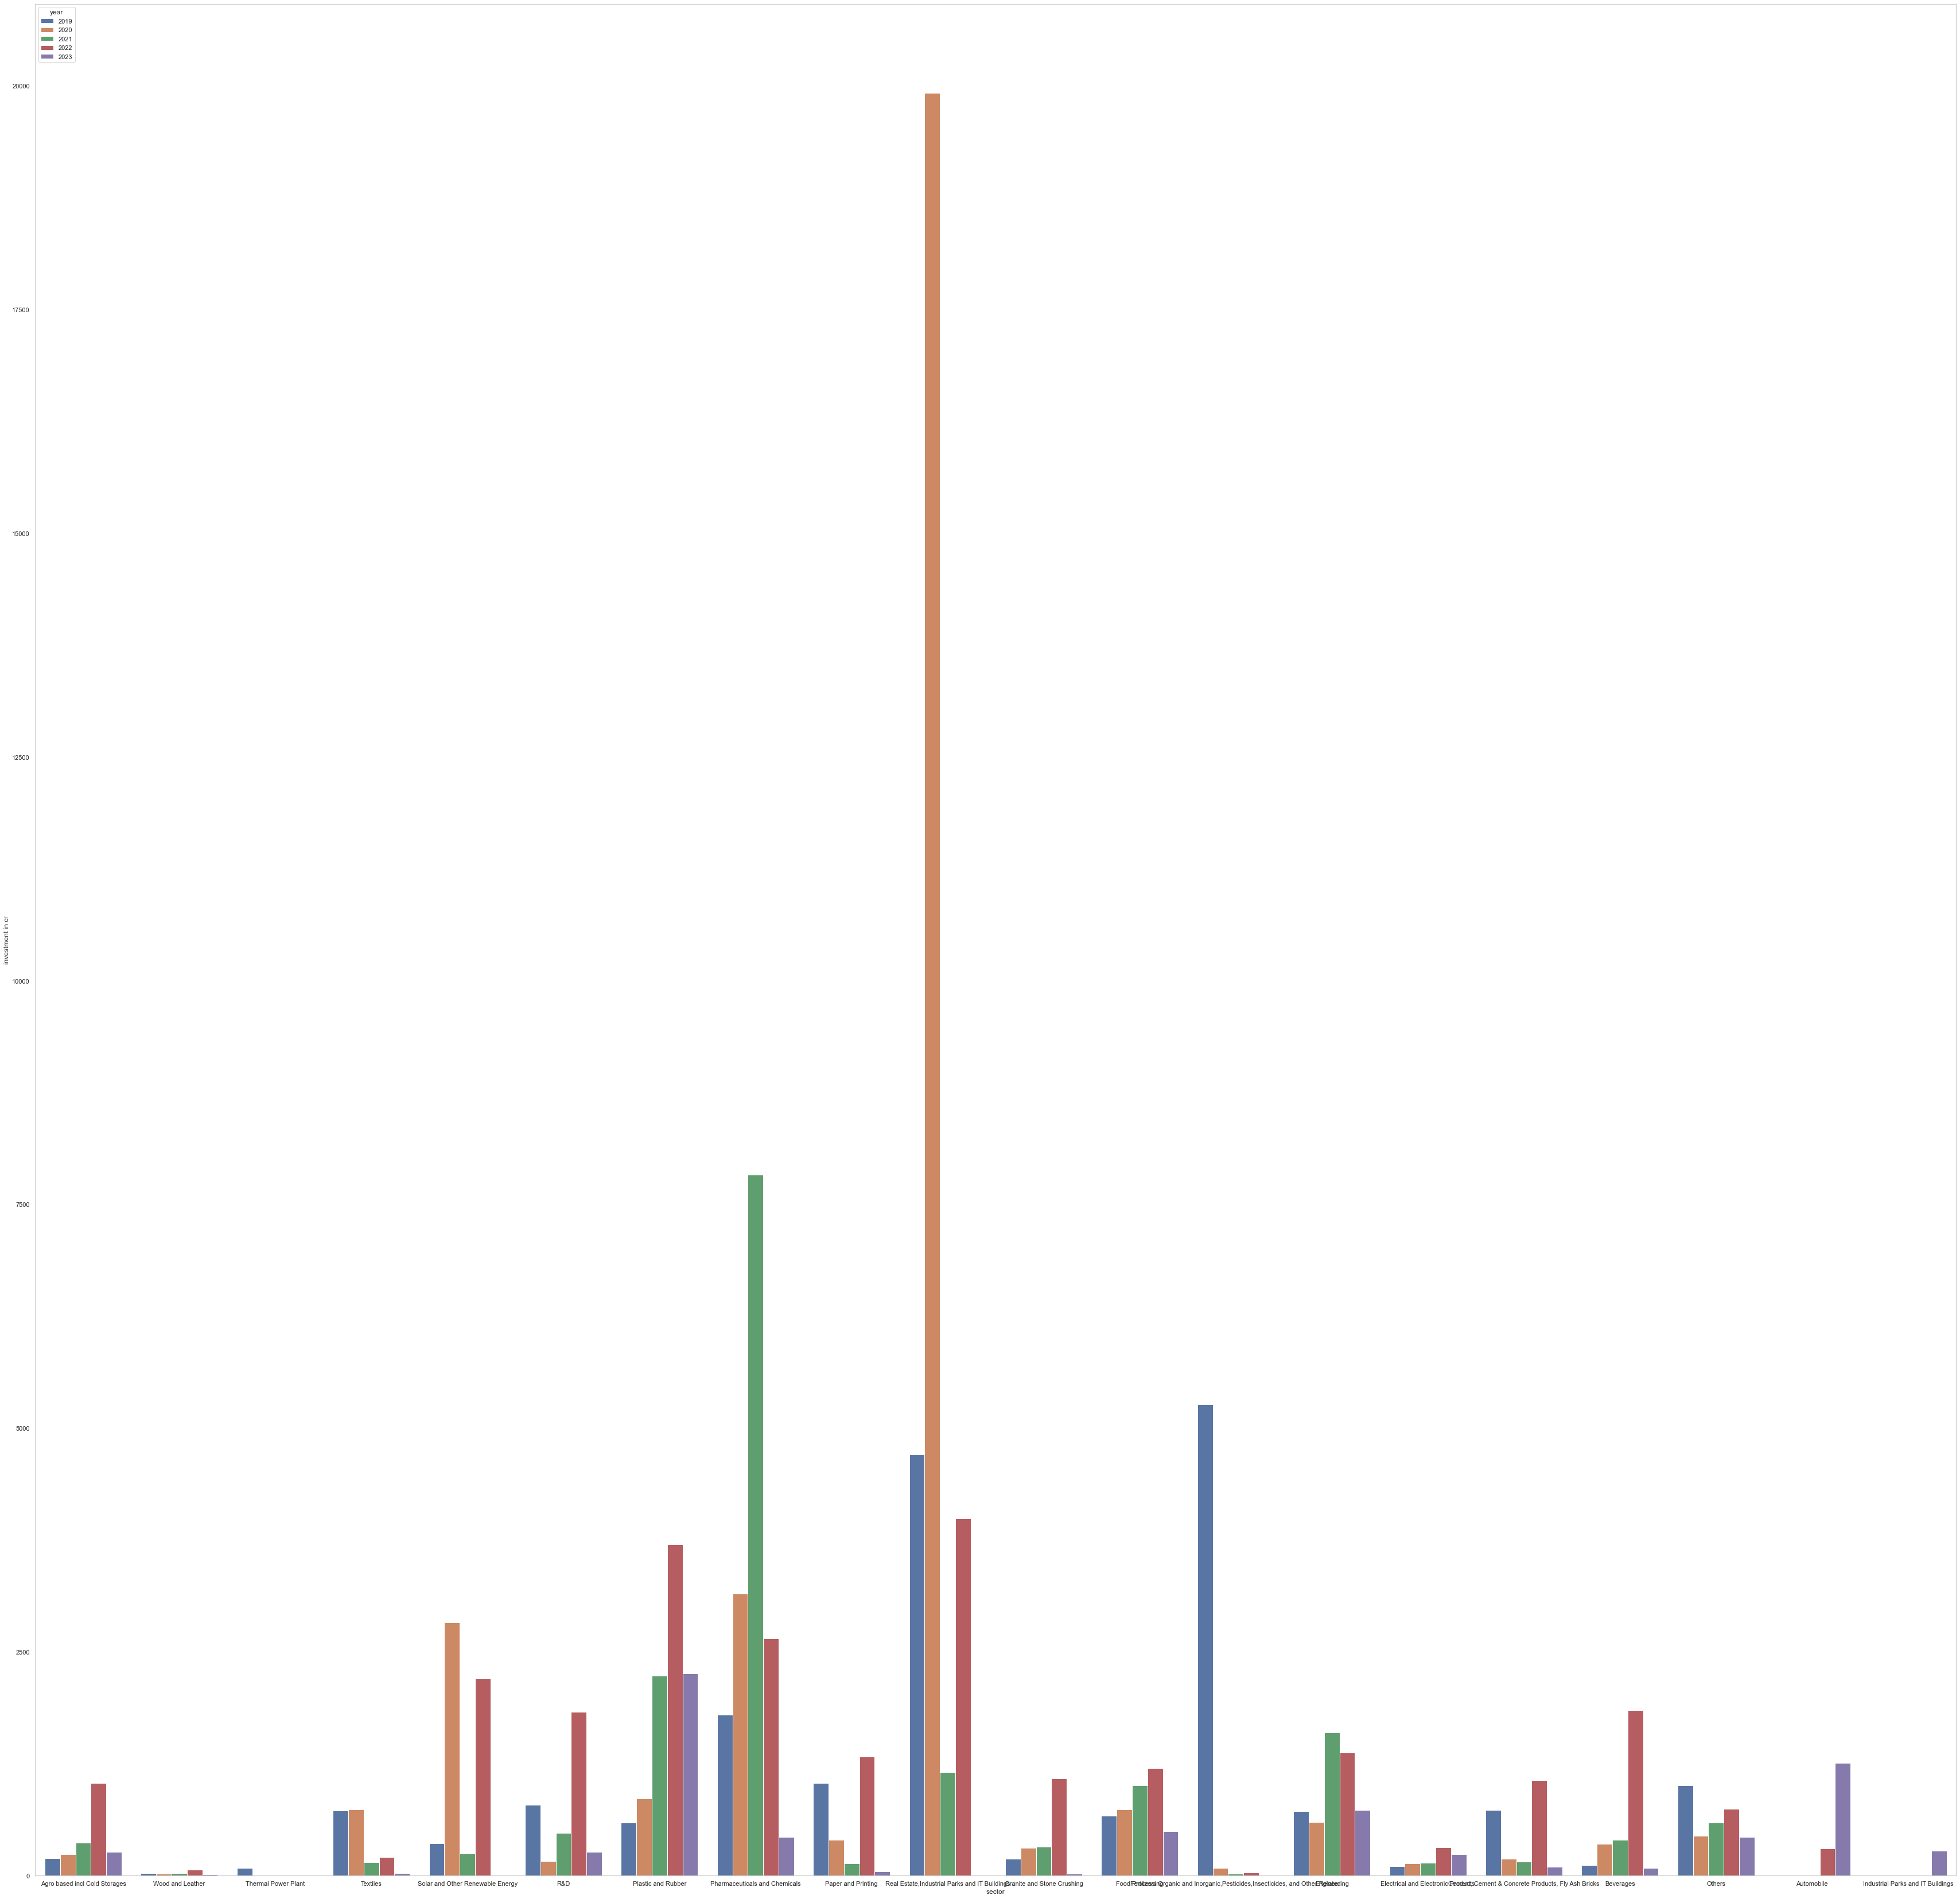

In [379]:
sns.barplot(data=sectors_years,x='sector',y='investment in cr',hue='year')


Here is another viz of sector and investment in cr through years in hue colors. As we can see there is no sector that kept growing since 2019-2023 constantly.However we have Plastic and Rubber sector  that had constant growth until 2023 and I believe it might have a better growth 2022 till the end of 2023. We also have sectors such as Pharmaceuticals and Chemicals and Real Estate sectors that had significant growth in the 1st,2nd and 3rd years of investment

Secondary Research

1. What are the top 5 districts to buy commercial properties in
Telangana? Justify your answer.

In [384]:
Real_estate=['Real Estate,Industrial Parks and IT Buildings']

In [385]:
commercial_property=Tl_Ipass[Tl_Ipass['sector'].isin(Real_estate)]

In [389]:
commercial_property.groupby('dist_code')[['investment in cr']].sum().sort_values(by='investment in cr',ascending=False)

,investment in cr
dist_code,
15_1,28970.2729
15_2,776.4890
17_2,20.9600
23_3,10.0000
20_1,0.4522


These are top 5 districts to buy 

2. What significant policies or initiatives were put into effect to
enhance economic growth, investments, and employment in
Telangana by the current government? Can we quantify the
impact of these policies using available data?

In [395]:
sector_year=Tl_Ipass.groupby(['sector','year'])[['number_of_employees']].sum()

In [404]:
sector_year.reset_index(inplace=True)

In [405]:
sector_year

,sector,year,number_of_employees
0,Agro based incl Cold Storages,2019,2892
1,Agro based incl Cold Storages,2020,3451
2,Agro based incl Cold Storages,2021,3780
3,Agro based incl Cold Storages,2022,2156
4,Agro based incl Cold Storages,2023,451
...,...,...,...
85,Wood and Leather,2019,799
86,Wood and Leather,2020,638
87,Wood and Leather,2021,744
88,Wood and Leather,2022,1197


<AxesSubplot:xlabel='sector', ylabel='number_of_employees'>

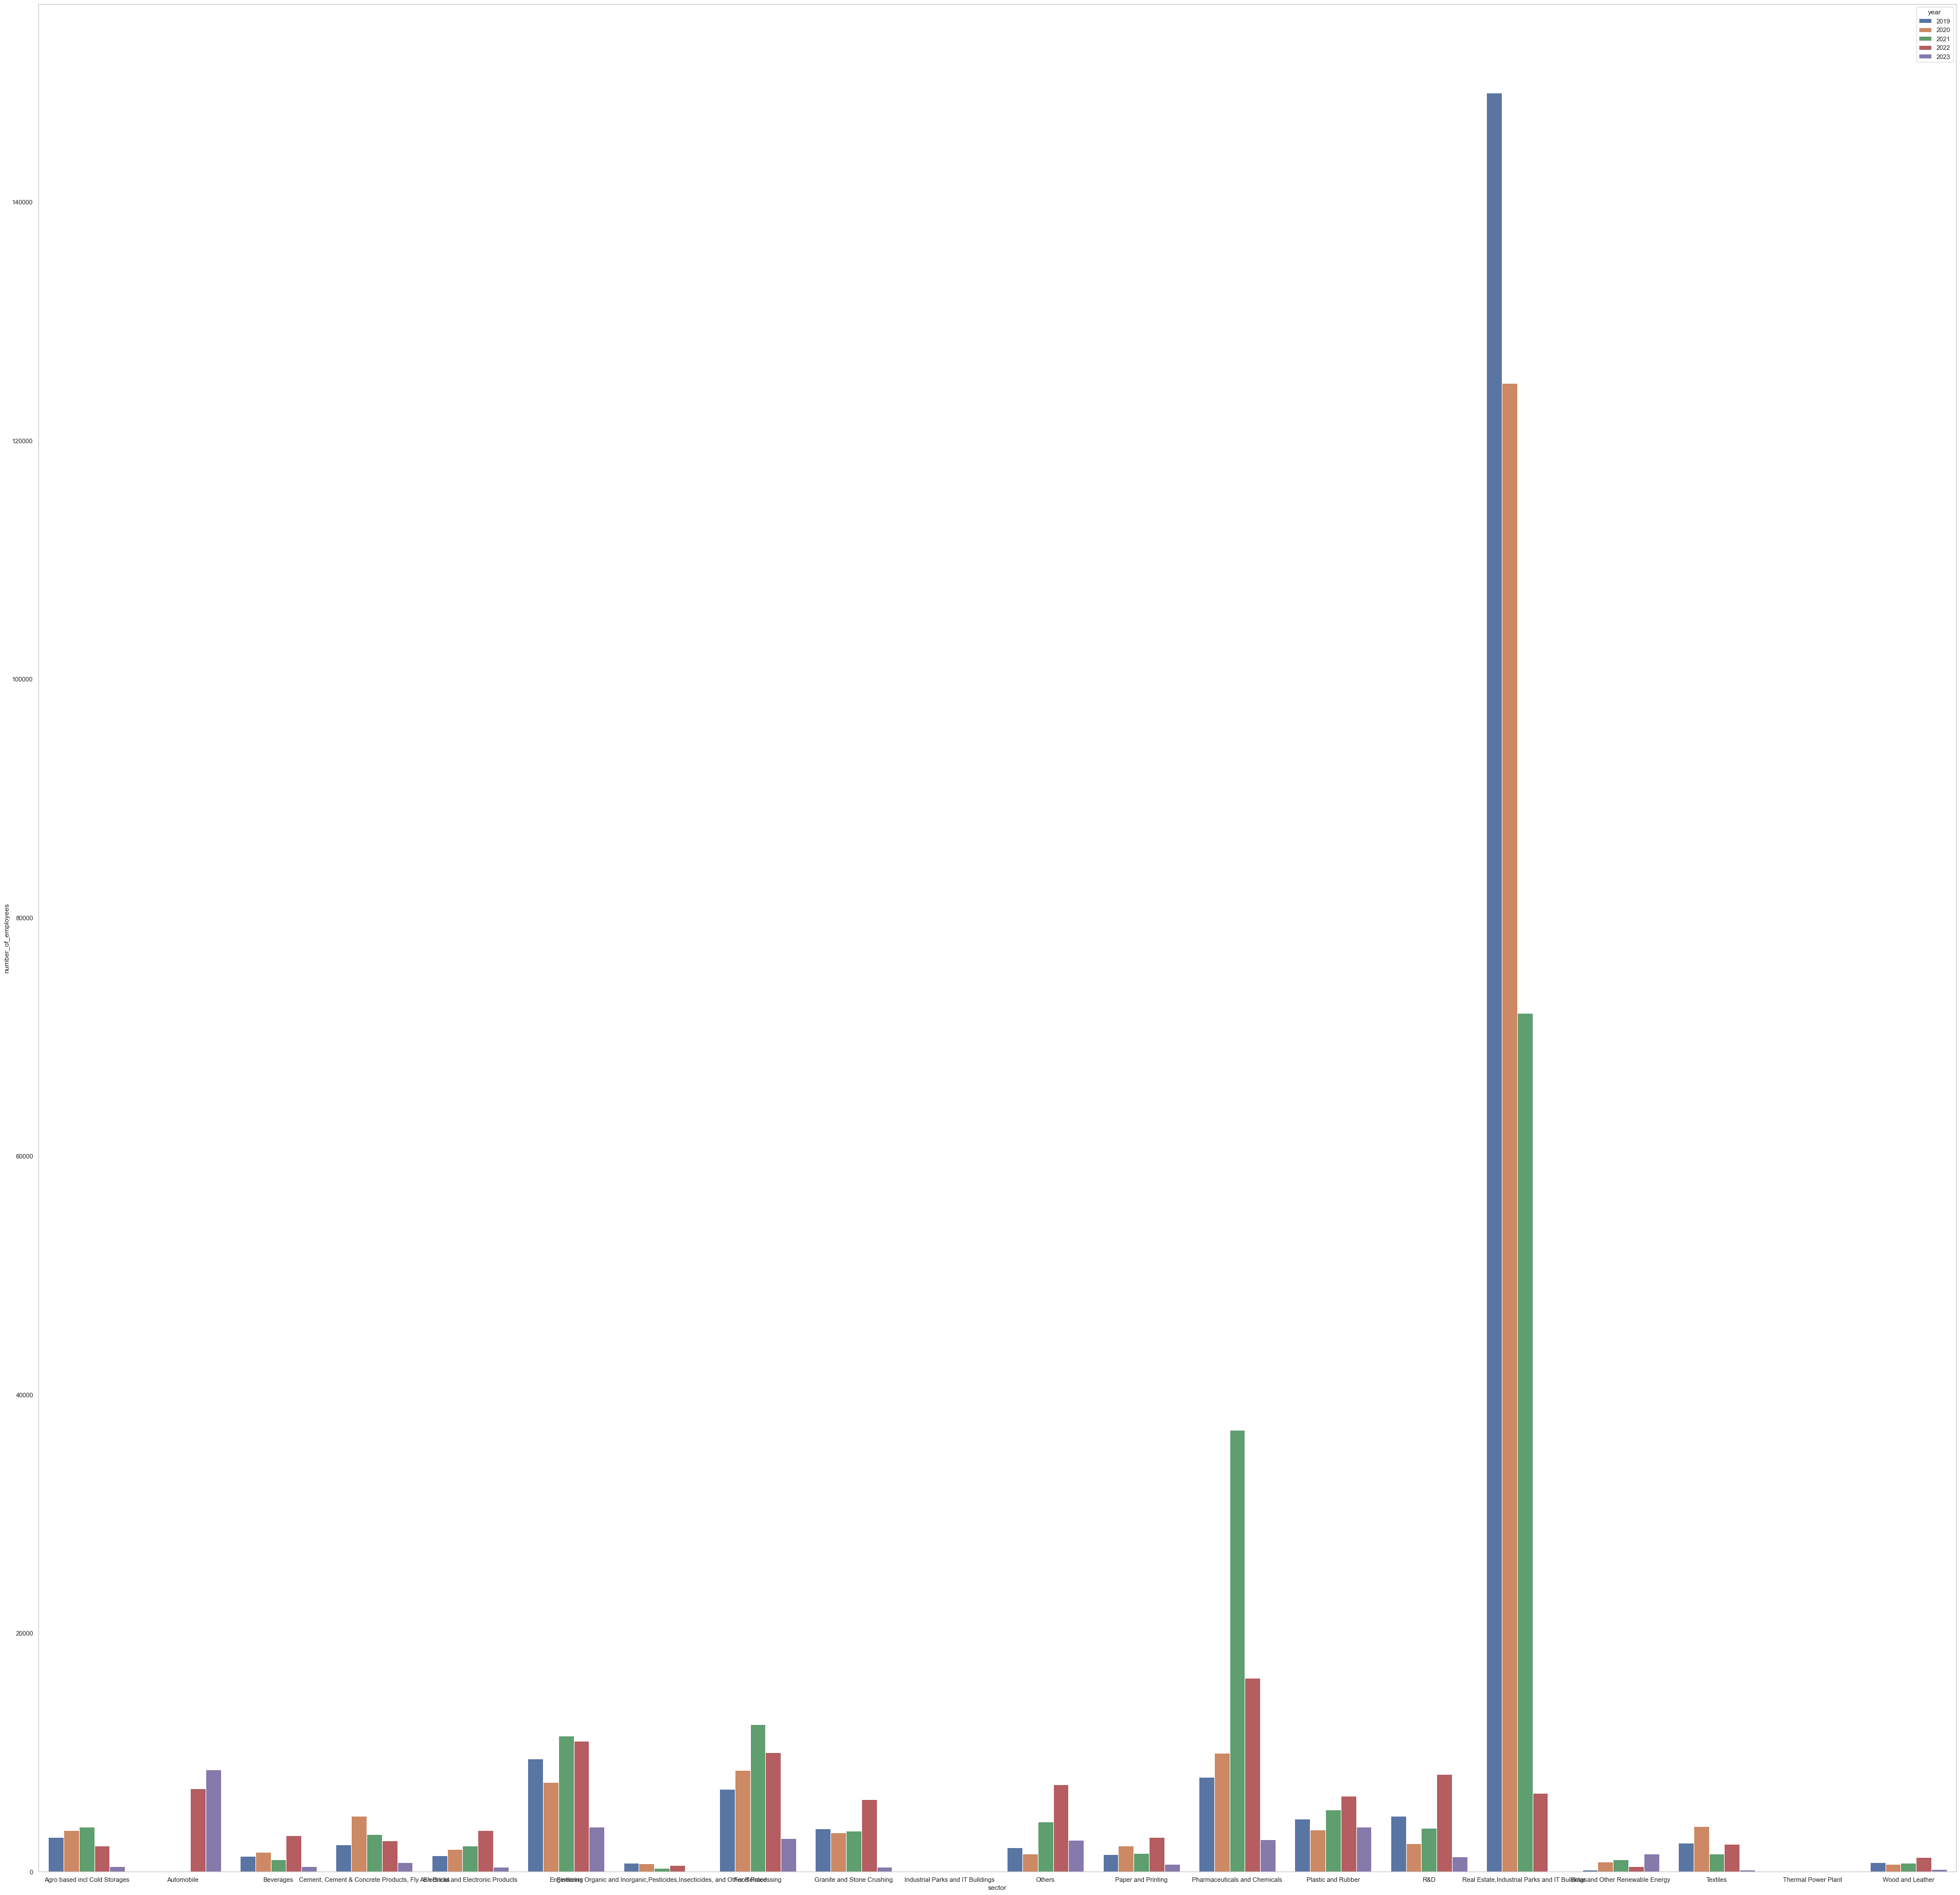

In [424]:
sns.barplot(data=sector_year,x='sector',y='number_of_employees',hue='year')

Here at the viz, we are looking at number of employees in every sector through out the years,I can see that government have enhanced its investment and number of employees in Real Estate a lot more comparing to other sectors. I can say that governments policy to economic growth is by investing a lot in Real Estate

3. Provide top 5 Insights & 5 recommendations to Telangana
government for sustained growth in the next 5 years based on
your analysis.

In this statements I will be writing my reccomendation for Telangana government for sustained growth in the next 5 years



1. Through my analysis 1st thing that dragged my attention was citizens of Telangana have not adopted to estamps and numbers have not increased significantly since Government have started estamps regulations. I think Telangana goverment can make estamps cheaper than document registration so it can make people to do process by estamp. Because estamps is time saving and easier to gather data without error

2. Another reccomendation I would give to Telangana Government is to try to invest balanced through all districts.From my visulaization It did catch my attention that some stricts are investmented more in sectors comparing to other districts 

3. When I was looking through invesments in different sectors I also noticed unbalanced investment through different sectors. Investments in Real Estate and Pharmaceuticals and Chemicals have been top invested sectors. When you compare the  differnce in invested money to these 2 sectors and other sectors, difference is huge. I would suggest to the government to invest more to other sectors as well 

4. Next thing I want to mention is number of employees per sector,Employees in all sectors are on decline since 2021. It will affect sustainable growth of a government. Increase of unemployment is a huge risk for citizens and for a government. I think Telangana government should work on this issue 

5. Last thing I want to mention is about sales of fuel type cars. By looking at the  car sales data in Telangana government we can see that sales of fuel type car is significantly high comparing to Ev cars. It's important to have a balance between sales of both type cars as it affects our envirenment.Telangana have to advertise Ev cars more to convince its citizen to buy Ev cars also. Having balance is important for our future and our environment